# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Daniel E. Daud
- **Email:** danieldaud1989@gmail.com
- **ID Dicoding:** Daniel Eduardo Daud

## Menentukan Pertanyaan Bisnis

1. Bagaimana rata-rata perbulan dari kadar PM2.5 di masing-masing kota?
2. Bagaimana rata-rata perbulan dari kadar PM10 di masing-masing kota?
3. Kota mana yang memiliki kondisi kualitas udara yang paling buruk?
4. Bagaimana pengaruh arah angin dengan kadar PM2.5 di awal tahun 2017 di kota Wanshouxigong?
5. Rata-rata kadar PM2.5 paling tinggi terjadi di hari apa di setiap kota?
6. Bagaimana cara mengurangi kadar PM2.5 pada udara?

## Import Semua Packages/Library yang Digunakan

In [1]:
from tabulate import tabulate
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
path_data = os.path.join(os.path.abspath(os.curdir),"Air Quality")
df = pd.DataFrame()
for data in os.listdir(path_data):
    if data.endswith(".csv"):
        df1 = pd.read_csv(os.path.join(path_data,data))
        df = pd.concat([df,df1],axis=0,ignore_index=True)

In [3]:
data_area = list(df["station"].unique())
data_area

['Aotizhongxin',
 'Changping',
 'Dingling',
 'Dongsi',
 'Guanyuan',
 'Gucheng',
 'Huairou',
 'Nongzhanguan',
 'Shunyi',
 'Tiantan',
 'Wanliu',
 'Wanshouxigong']

In [4]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### Assessing Data

#### Check Data Type

In [5]:
print('Dataframe:')
print(df.info())

Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None


#### Check Missing Values

In [6]:
print('Dataframe:')
print(df.isna().sum())

Dataframe:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


Berdasarkan pengecekan data yang kosong, terdapat beberapa data yang memiliki data yang kosong.

#### Check Duplicate

In [7]:
print(f'Dataframe: {df.duplicated().sum()}')

Dataframe: 0


Tidak ada data yang terduplikasi

### Cleaning Data

#### Get day from date

In [8]:
def get_day_from_date(year, month, date):
    datetime_format = datetime.datetime(year,month,date)
    day_name = datetime_format.strftime("%A")
    return day_name

df['hari'] = df.apply(lambda x: get_day_from_date(x[1], x[2], x[3]),axis = 1)
df


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,hari
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Friday
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Friday
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Friday
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Friday
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,Tuesday
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,Tuesday
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,Tuesday
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,Tuesday


In [9]:
df['date'] = df.apply(lambda x: datetime.datetime(x[1], x[2], x[3]), axis=1)
df['date_hour'] = df.apply(lambda x: datetime.datetime(x[1], x[2], x[3], x[4]), axis=1)
df['year_month'] = df.apply(lambda x: datetime.datetime(x[1], x[2], 1).strftime('%Y-%m'), axis=1)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,PRES,DEWP,RAIN,wd,WSPM,station,hari,date,date_hour,year_month
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Friday,2013-03-01,2013-03-01 00:00:00,2013-03
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Friday,2013-03-01,2013-03-01 01:00:00,2013-03
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Friday,2013-03-01,2013-03-01 02:00:00,2013-03
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Friday,2013-03-01,2013-03-01 03:00:00,2013-03
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Friday,2013-03-01,2013-03-01 04:00:00,2013-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,...,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,Tuesday,2017-02-28,2017-02-28 19:00:00,2017-02
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,...,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,Tuesday,2017-02-28,2017-02-28 20:00:00,2017-02
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,...,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,Tuesday,2017-02-28,2017-02-28 21:00:00,2017-02
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,...,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,Tuesday,2017-02-28,2017-02-28 22:00:00,2017-02


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   No          420768 non-null  int64         
 1   year        420768 non-null  int64         
 2   month       420768 non-null  int64         
 3   day         420768 non-null  int64         
 4   hour        420768 non-null  int64         
 5   PM2.5       412029 non-null  float64       
 6   PM10        414319 non-null  float64       
 7   SO2         411747 non-null  float64       
 8   NO2         408652 non-null  float64       
 9   CO          400067 non-null  float64       
 10  O3          407491 non-null  float64       
 11  TEMP        420370 non-null  float64       
 12  PRES        420375 non-null  float64       
 13  DEWP        420365 non-null  float64       
 14  RAIN        420378 non-null  float64       
 15  wd          418946 non-null  object        
 16  WS

#### Handling Missing Values

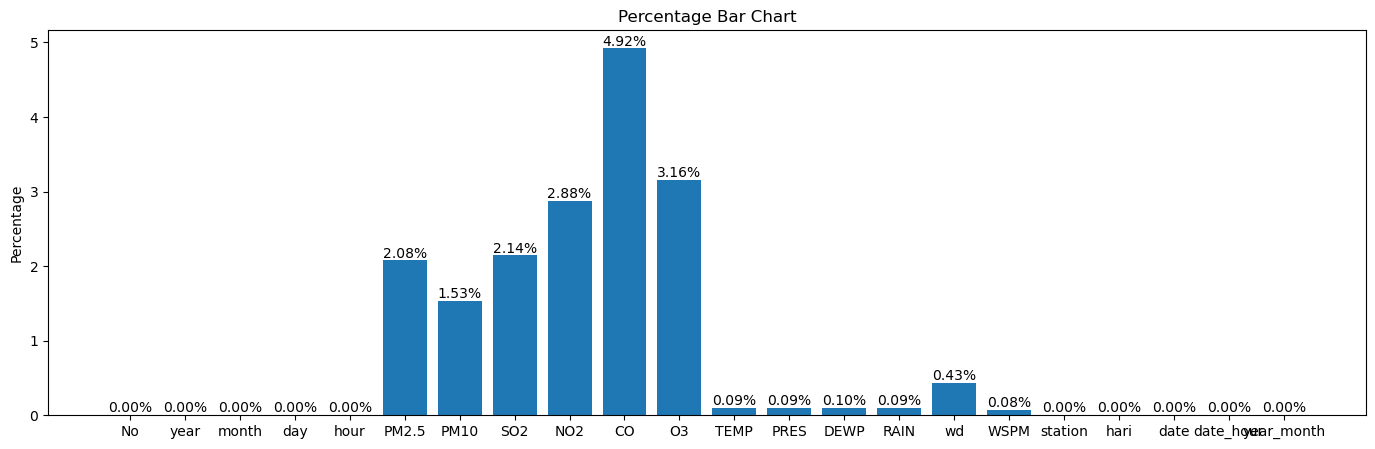

In [11]:
# Plot Missing Value
column_name = list(df.columns)
count_missing_values = list(df.isna().sum())
count_data = list(df.isna().count())
percentage_mising_values = [count_missing_values[i]/count_data[i] * 100 for i in range(len(count_data))]


plt.figure(figsize=(17,5))
plot_bar = plt.bar(column_name,percentage_mising_values)

for bar in plot_bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.ylabel('Percentage')
plt.title('Percentage Bar Chart')

plt.show()


Berdasarkan plot diatas, banyaknya data yang memiliki nilai yang kosong paling banyak pada kolom CO yaitu sebanyak 4.92% dari seluruh data.

Berdasarkan hal tersebut untuk mengisi nilai kosong pada variabel PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, wd, dan WSPM akan di isi dengan nilai sebelumnya.


In [12]:
# Mengisi nilai kosong dipisahkan berdasarkan kota
for area in data_area:
    df.loc[df['station'] == area] = df.loc[df['station'] == area].fillna(method='ffill')

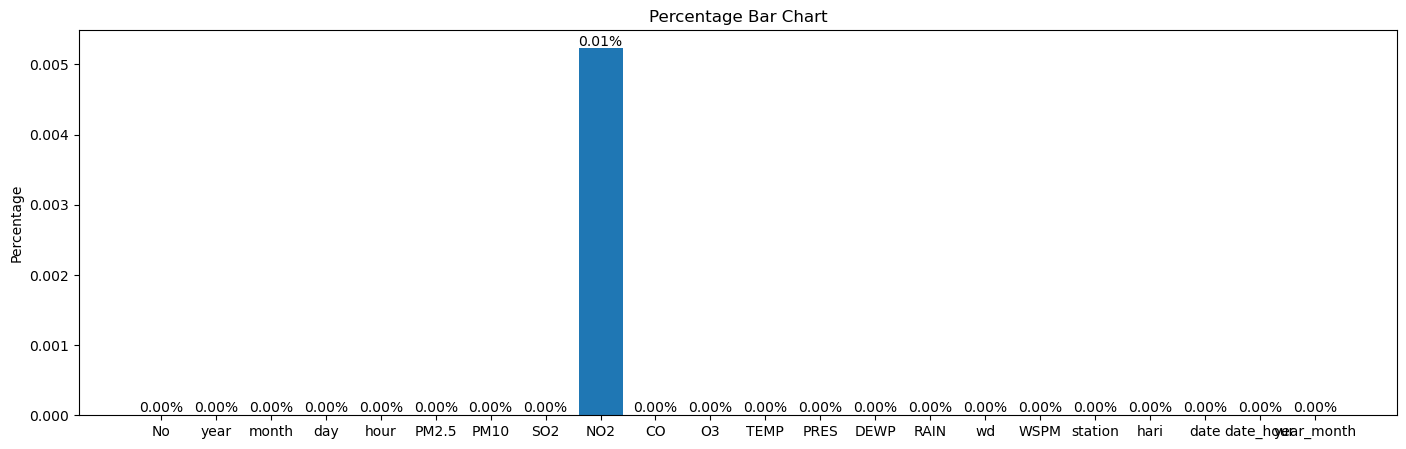

In [13]:
# Plot Missing Value
column_name = list(df.columns)
count_missing_values = list(df.isna().sum())
count_data = list(df.isna().count())
percentage_mising_values = [count_missing_values[i]/count_data[i] * 100 for i in range(len(count_data))]


plt.figure(figsize=(17,5))
plot_bar = plt.bar(column_name,percentage_mising_values)

for bar in plot_bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.ylabel('Percentage')
plt.title('Percentage Bar Chart')

plt.show()

In [14]:
df.loc[df['NO2'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,PRES,DEWP,RAIN,wd,WSPM,station,hari,date,date_hour,year_month
70128,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,...,1020.8,-19.7,0.0,E,0.5,Dingling,Friday,2013-03-01,2013-03-01 00:00:00,2013-03
70129,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,...,1021.3,-19.0,0.0,ENE,0.7,Dingling,Friday,2013-03-01,2013-03-01 01:00:00,2013-03
175320,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,...,1021.1,-18.6,0.0,NW,4.4,Gucheng,Friday,2013-03-01,2013-03-01 00:00:00,2013-03
175321,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,...,1021.5,-19.0,0.0,NW,4.0,Gucheng,Friday,2013-03-01,2013-03-01 01:00:00,2013-03
175322,3,2013,3,1,2,5.0,18.0,5.0,NaN,700.0,...,1021.5,-19.8,0.0,WNW,4.6,Gucheng,Friday,2013-03-01,2013-03-01 02:00:00,2013-03
175323,4,2013,3,1,3,6.0,20.0,6.0,NaN,700.0,...,1022.7,-21.2,0.0,W,2.8,Gucheng,Friday,2013-03-01,2013-03-01 03:00:00,2013-03
175324,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,...,1023.0,-21.4,0.0,WNW,3.6,Gucheng,Friday,2013-03-01,2013-03-01 04:00:00,2013-03
175325,6,2013,3,1,5,4.0,11.0,3.0,NaN,700.0,...,1023.6,-21.9,0.0,E,1.2,Gucheng,Friday,2013-03-01,2013-03-01 05:00:00,2013-03
175326,7,2013,3,1,6,3.0,6.0,3.0,NaN,700.0,...,1024.3,-20.4,0.0,ENE,1.2,Gucheng,Friday,2013-03-01,2013-03-01 06:00:00,2013-03
175327,8,2013,3,1,7,5.0,5.0,3.0,NaN,800.0,...,1025.6,-20.5,0.0,ENE,1.1,Gucheng,Friday,2013-03-01,2013-03-01 07:00:00,2013-03


In [15]:
df.loc[df['NO2'].isna(),'station'].value_counts()

Gucheng     20
Dingling     2
Name: station, dtype: int64

Dapat dilihat bahwa data kosong pada NO2 terjadi di awal tanggal di tahun 2013 sehingga data tersebut akan kita buang saja, agar jumlah data setiap kota tetap sama, maka akan kita buang data 1 hari pertama di yaitu pada tanggal 1 Maret 2013.

In [16]:
new_df = pd.DataFrame()

for area in data_area:
    df1 = df.loc[df['station']==area][24:]
    new_df = pd.concat([new_df,df1],axis=0,ignore_index=True)

new_df.reset_index(drop=True, inplace=True)

In [17]:
new_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,PRES,DEWP,RAIN,wd,WSPM,station,hari,date,date_hour,year_month
0,25,2013,3,2,0,22.0,24.0,24.0,44.0,500.0,...,1031.0,-17.6,0.0,ENE,1.4,Aotizhongxin,Saturday,2013-03-02,2013-03-02 00:00:00,2013-03
1,26,2013,3,2,1,14.0,17.0,21.0,36.0,400.0,...,1031.3,-17.3,0.0,NNE,1.1,Aotizhongxin,Saturday,2013-03-02,2013-03-02 01:00:00,2013-03
2,27,2013,3,2,2,13.0,13.0,20.0,37.0,400.0,...,1030.9,-16.9,0.0,E,1.7,Aotizhongxin,Saturday,2013-03-02,2013-03-02 02:00:00,2013-03
3,28,2013,3,2,3,3.0,9.0,13.0,34.0,400.0,...,1030.6,-17.6,0.0,NNE,1.4,Aotizhongxin,Saturday,2013-03-02,2013-03-02 03:00:00,2013-03
4,29,2013,3,2,4,3.0,7.0,18.0,43.0,400.0,...,1030.8,-17.7,0.0,NNW,0.9,Aotizhongxin,Saturday,2013-03-02,2013-03-02 04:00:00,2013-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420475,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,...,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,Tuesday,2017-02-28,2017-02-28 19:00:00,2017-02
420476,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,...,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,Tuesday,2017-02-28,2017-02-28 20:00:00,2017-02
420477,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,...,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,Tuesday,2017-02-28,2017-02-28 21:00:00,2017-02
420478,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,...,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,Tuesday,2017-02-28,2017-02-28 22:00:00,2017-02


## Exploratory Data Analysis (EDA)

### Exploring data per Kota

In [18]:
print(f"Banyaknya data per kota: ")
print(new_df['station'].value_counts())
print(f"\nBanyaknya hari {new_df['station'].value_counts()[0]/24:.0f} hari")


Banyaknya data per kota: 
Aotizhongxin     35040
Changping        35040
Dingling         35040
Dongsi           35040
Guanyuan         35040
Gucheng          35040
Huairou          35040
Nongzhanguan     35040
Shunyi           35040
Tiantan          35040
Wanliu           35040
Wanshouxigong    35040
Name: station, dtype: int64

Banyaknya hari 1460 hari


Banyaknya masing-masing kota adalah 35.040 jam, sehingga akan ada 1460 hari.

### Ringkasan Data per kota

In [19]:
print(f"Summary Area: {data_area[0]}")
new_df.loc[new_df["station"]==data_area[0],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Aotizhongxin


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,83.215733,110.801744,17.577237,59.315968,1267.645862,55.178559,13.590257,1011.841426,3.135260,0.067429
std,82.294702,95.372347,22.826129,37.005953,1242.350167,57.600382,11.399973,10.400891,13.683313,0.910108
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000
25%,22.000000,38.000000,3.000000,30.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000
50%,60.000000,88.000000,9.000000,54.000000,900.000000,41.000000,14.600000,1011.400000,3.800000,0.000000
75%,114.000000,157.000000,22.000000,81.000000,1600.000000,82.000000,23.300000,1020.100000,15.600000,0.000000
max,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000


In [20]:
print(f"Summary Area: {data_area[1]}")
new_df.loc[new_df["station"]==data_area[1],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Changping


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,71.164675,94.846881,14.957652,44.259819,1160.570833,58.030579,13.679648,1007.760316,1.501592,0.060337
std,72.428470,84.006603,21.105445,29.650960,1127.356380,54.446696,11.367147,10.221165,13.822424,0.752616
min,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000
25%,18.000000,34.000000,2.000000,22.000000,500.000000,15.422400,3.400000,999.300000,-10.200000,0.000000
50%,47.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.700000,0.000000
75%,100.000000,130.000000,18.000000,61.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000
max,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000


In [21]:
print(f"Summary Area: {data_area[2]}")
new_df.loc[new_df["station"]==data_area[2],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Dingling


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,67.471675,84.277092,11.778597,27.337546,925.248858,71.972319,13.679648,1007.760316,1.501592,0.060337
std,74.827882,80.263184,15.581843,26.318938,897.970917,66.328801,11.367147,10.221165,13.822424,0.752616
min,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000
25%,14.000000,26.000000,2.000000,8.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000
50%,41.000000,60.000000,5.000000,19.000000,600.000000,62.000000,14.700000,1007.400000,1.700000,0.000000
75%,95.000000,118.000000,14.851200,38.000000,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000
max,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000


In [22]:
print(f"Summary Area: {data_area[3]}")
new_df.loc[new_df["station"]==data_area[3],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Dongsi


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,86.365014,110.653262,18.534377,52.210808,1363.909903,57.515584,13.677201,1012.540741,2.461495,0.064027
std,86.341545,98.179818,22.980161,34.479712,1201.369257,58.691263,11.459211,10.261266,13.802712,0.786327
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000
25%,23.000000,38.000000,3.141600,26.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000
50%,61.000000,87.000000,10.000000,46.000000,1000.000000,44.000000,14.600000,1012.200000,3.100000,0.000000
75%,120.000000,151.000000,24.000000,72.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000
max,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000


In [23]:
print(f"Summary Area: {data_area[4]}")
new_df.loc[new_df["station"]==data_area[4],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Guanyuan


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,83.098739,109.281989,17.613612,57.980229,1247.242637,54.850973,13.590257,1011.841426,3.135260,0.067429
std,81.310786,92.490899,23.650782,35.211292,1154.533273,57.293562,11.399973,10.400891,13.683313,0.910108
min,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000
25%,23.000000,40.000000,3.000000,31.000000,500.000000,6.426000,3.100000,1003.300000,-8.100000,0.000000
50%,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.600000,1011.400000,3.800000,0.000000
75%,115.000000,149.000000,22.000000,78.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000
max,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000


In [24]:
print(f"Summary Area: {data_area[5]}")
new_df.loc[new_df["station"]==data_area[5],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Gucheng


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.00000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,84.397066,119.399181,16.026061,55.82789,1353.037700,58.690660,13.864019,1008.824892,2.615725,0.064418
std,83.233710,97.647209,27.039688,36.53470,1236.614546,58.260005,11.294726,10.099454,13.782091,0.838428
min,2.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000
25%,24.000000,45.000000,2.000000,26.00000,600.000000,10.000000,3.600000,1000.500000,-8.925000,0.000000
50%,60.000000,100.000000,7.000000,50.00000,1000.000000,45.000000,14.800000,1008.500000,3.000000,0.000000
75%,116.000000,167.000000,20.000000,79.00000,1700.000000,84.000000,23.500000,1017.000000,15.300000,0.000000
max,770.000000,994.000000,500.000000,276.00000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000


In [25]:
print(f"Summary Area: {data_area[6]}")
new_df.loc[new_df["station"]==data_area[6],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Huairou


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,69.992326,92.708684,12.260079,32.057916,1022.875970,61.341682,12.438493,1007.601995,2.234837,0.068079
std,71.201689,85.129505,18.927331,26.301931,895.056871,57.338494,11.754560,10.020856,14.051307,0.849069
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000
25%,17.000000,29.000000,2.000000,12.000000,400.000000,19.000000,2.100000,999.400000,-9.700000,0.000000
50%,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000
75%,99.000000,132.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000
max,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000


In [26]:
print(f"Summary Area: {data_area[7]}")
new_df.loc[new_df["station"]==data_area[7],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Nongzhanguan


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,85.343465,109.542400,18.770667,58.156265,1325.840268,58.443898,13.677201,1012.540741,2.461495,0.064027
std,86.989844,96.197879,24.411987,36.476645,1260.081476,58.389325,11.459211,10.261266,13.802712,0.786327
min,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000
25%,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000
50%,59.000000,86.000000,9.000000,51.000000,900.000000,44.000000,14.600000,1012.200000,3.100000,0.000000
75%,116.000000,150.000000,24.000000,80.000000,1600.000000,83.000000,23.500000,1020.900000,15.000000,0.000000
max,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000


In [27]:
print(f"Summary Area: {data_area[8]}")
new_df.loc[new_df["station"]==data_area[8],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Shunyi


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,80.070340,99.757100,13.461932,44.581043,1204.537072,53.856905,13.384379,1013.060986,2.466441,0.061056
std,82.101322,91.820391,19.563271,31.618946,1171.606899,54.897176,11.484154,10.172197,13.724242,0.761378
min,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000
25%,20.000000,31.000000,2.000000,20.000000,400.000000,9.000000,3.000000,1004.700000,-8.800000,0.000000
50%,55.000000,77.000000,5.000000,37.000000,900.000000,41.000000,14.400000,1012.700000,3.100000,0.000000
75%,113.000000,139.000000,16.000000,63.000000,1600.000000,76.000000,23.200000,1021.000000,15.100000,0.000000
max,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000


In [28]:
print(f"Summary Area: {data_area[9]}")
new_df.loc[new_df["station"]==data_area[9],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Tiantan


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,82.306324,106.720154,14.479233,53.259289,1308.867180,56.456808,13.677201,1012.540741,2.461495,0.064027
std,81.135415,90.431957,20.514618,31.998211,1184.642781,60.863152,11.459211,10.261266,13.802712,0.786327
min,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000
25%,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000
50%,59.000000,85.000000,7.000000,47.000000,900.000000,40.055400,14.600000,1012.200000,3.100000,0.000000
75%,114.000000,144.000000,17.000000,71.000000,1600.000000,82.000000,23.500000,1020.900000,15.000000,0.000000
max,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000


In [29]:
print(f"Summary Area: {data_area[10]}")
new_df.loc[new_df["station"]==data_area[10],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Wanliu


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.00000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,83.567777,110.724238,18.422391,65.99405,1332.341096,46.920791,13.434566,1011.091925,3.278827,0.068271
std,82.181794,93.610975,22.750282,38.24318,1268.149064,54.470313,11.347753,10.351696,13.672329,0.896776
min,2.000000,2.000000,0.285600,1.64240,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000
25%,23.000000,40.000000,4.000000,36.95400,600.000000,3.000000,3.200000,1002.500000,-8.100000,0.000000
50%,59.000000,88.000000,10.000000,61.00000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000
75%,116.000000,154.000000,23.000000,90.00000,1600.000000,70.000000,22.900000,1019.400000,15.800000,0.000000
max,957.000000,951.000000,282.000000,264.00000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000


In [30]:
print(f"Summary Area: {data_area[11]}")
new_df.loc[new_df["station"]==data_area[11],['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN']].describe()

Summary Area: Wanshouxigong


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,85.409518,112.799064,17.376783,55.669056,1377.637586,55.977165,13.790317,1011.506509,2.720942,0.064329
std,86.633575,98.698053,24.277609,36.090776,1238.969612,57.184703,11.386057,10.568401,13.697461,0.797037
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000
25%,23.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000
50%,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000
75%,117.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.300000,0.000000
max,999.000000,961.000000,411.000000,251.000000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000


### Summarize data Per bulan per Kota

In [31]:
for area in data_area:
    print(f"\n\nPada Area: {area}")
    print(tabulate(new_df[new_df['station'] == area].drop(["No","day","hour","month"],axis=1).groupby(by=["year"]).mean(numeric_only=True), headers='keys'))



Pada Area: Aotizhongxin
  year    PM2.5     PM10      SO2      NO2       CO       O3       TEMP     PRES       DEWP        RAIN     WSPM
------  -------  -------  -------  -------  -------  -------  ---------  -------  ---------  ----------  -------
  2013  82.7413  113.27   23.609   63.5174  1141.34  46.9494  15.544     1008.14    6.54806  0.0718169   1.52735
  2014  91.4134  124.382  21.9753  64.063   1215.45  48.1126  13.8781    1011.32    4.1622   0.0566096   1.47689
  2015  82.0755  112.158  14.3639  60.969   1438.05  63.5217  13.4747    1012.57    2.73174  0.0726712   1.89534
  2016  74.7732   94.463  10.8449  48.3254  1190.93  62.0165  13.8737    1012.82    2.30047  0.0797017   1.85903
  2017  94.3799  106.987  20.8298  66.1822  1665.25  47.3997   0.665657  1023.62  -13.1854   0.00310734  1.96116


Pada Area: Changping
  year    PM2.5      PM10       SO2      NO2       CO       O3       TEMP     PRES       DEWP        RAIN     WSPM
------  -------  --------  --------  ------- 

  year     PM2.5      PM10      SO2      NO2       CO       O3       TEMP     PRES       DEWP        RAIN     WSPM
------  --------  --------  -------  -------  -------  -------  ---------  -------  ---------  ----------  -------
  2013   84.0208  111.522   21.8228  56.1631  1416.3   52.9966  15.8994    1007.15    5.8335   0.0653962   1.58077
  2014   91.5184  128.048   23.3577  62.3616  1453.5   56.4581  14.2926    1010.96    3.01284  0.0490639   1.58815
  2015   84.497   111.4     14.3089  52.8269  1369.41  59.2805  13.5635    1012.41    2.82092  0.0731849   1.88871
  2016   78.0188   98.6133  10.5741  50.0437  1219.91  58.2168  13.8737    1012.82    2.30047  0.0797017   1.85903
  2017  106.289   121.724   18.5713  64.1914  1737.78  34.0805   0.665657  1023.62  -13.1854   0.00310734  1.96116


In [32]:
pd.pivot_table(new_df[["station","wd","year"]],values = ['year'],columns=["wd"],index=['station'],aggfunc='count')

year                                                        \
wd                E   ENE   ESE     N    NE   NNE   NNW    NW     S    SE   
station                                                                     
Aotizhongxin   2611  3953  1719  2062  5161  2442  1582  1862  1304  1349   
Changping      2430  1308  2789  3788  1732  1923  4786  3867  1701  1831   
Dingling       2430  1308  2789  3788  1732  1923  4786  3867  1701  1831   
Dongsi         3567  3865  2708  1862  3558  1929  1686  2466  1547  1888   
Guanyuan       2611  3953  1719  2062  5161  2442  1582  1862  1304  1349   
Gucheng        1609  1881  1357  3957  3128  2606  1615  2787  2351  1357   
Huairou        2182  2039  2031  1374  2275  1693  1675  5047  1331  2123   
Nongzhanguan   3567  3865  2708  1862  3558  1929  1686  2466  1547  1888   
Shunyi         1163  1418  1387  3915  3431  4598  1673  2470  2636  2703   
Tiantan        3567  3865  2708  1862  3558  1929  1686  2466  1547  1888   
Wanliu         1265  3640   572  3216  6740  3329  1391  1112   968   716   
Wanshouxigong  2810  3081  1773  1177  3581  1562  1186  2555  1506  1287   

                                                   
wd              SSE   SSW    SW     W   WNW   WSW  
station                                            
Aotizhongxin   1022  2099  3384  1175  1102  2213  
Changping      1853  1128   889  1423  2887   705  
Dingling       1853  1128   889  1423  2887   705  
Dongsi         1402  1954  2504   986  1348  1770  
Guanyuan       1022  2099  3384  1175  1102  2213  
Gucheng        1561  2768  2000  2343  2095  1625  
Huairou        1575  1351  1814  2160  4896  1474  
Nongzhanguan   1402  1954  2504   986  1348  1770  
Shunyi         2993  1607   996  1213  2078   759  
Tiantan        1402  1954  2504   986  1348  1770  
Wanliu          620  2105  4679  1336   816  2535  
Wanshouxigong  1035  2458  3451  2469  2562  2547

Note : Dalam bahasa inggris berikut ini arah mata angin

- E: East (Timur)
- ENE: East-Northeast (Timur Timur Laut)
- ESE: East-Southeast (Timur Tenggara)
- N: North (Utara)
- NE: Northeast (Timur Laut)
- NNE: North-Northeast (Utara Timur Laut)
- NNW: North-Northwest (Utara Barat Laut)
- NW: Northwest (Barat Laut)
- S: South (Selatan)
- SE: Southeast (Tenggara)
- SSE: South-Southeast (Selatan Tenggara)
- SSW: South-Southwest (Selatan Barat Daya)
- SW: Southwest (Barat Daya)
- W: West (Barat)
- WNW: West-Northwest (Barat Barat Laut)
- WSW: West-Southwest (Barat Barat Daya)

In [33]:
print("Arah mata angin yang paling banyak terjadi di setiap kota adalah sebagai berikut: ")
pd.pivot_table(new_df[["station","wd","year"]],values = ['year'],columns=["wd"],index=['station'],aggfunc='count').T.reset_index().set_index("wd").drop(["level_0"],axis=1).idxmax()

Arah mata angin yang paling banyak terjadi di setiap kota adalah sebagai berikut: 


station
Aotizhongxin      NE
Changping        NNW
Dingling         NNW
Dongsi           ENE
Guanyuan          NE
Gucheng            N
Huairou           NW
Nongzhanguan     ENE
Shunyi           NNE
Tiantan          ENE
Wanliu            NE
Wanshouxigong     NE
dtype: object

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana rata-rata perbulan dari kadar PM2.5 di masing-masing kota?

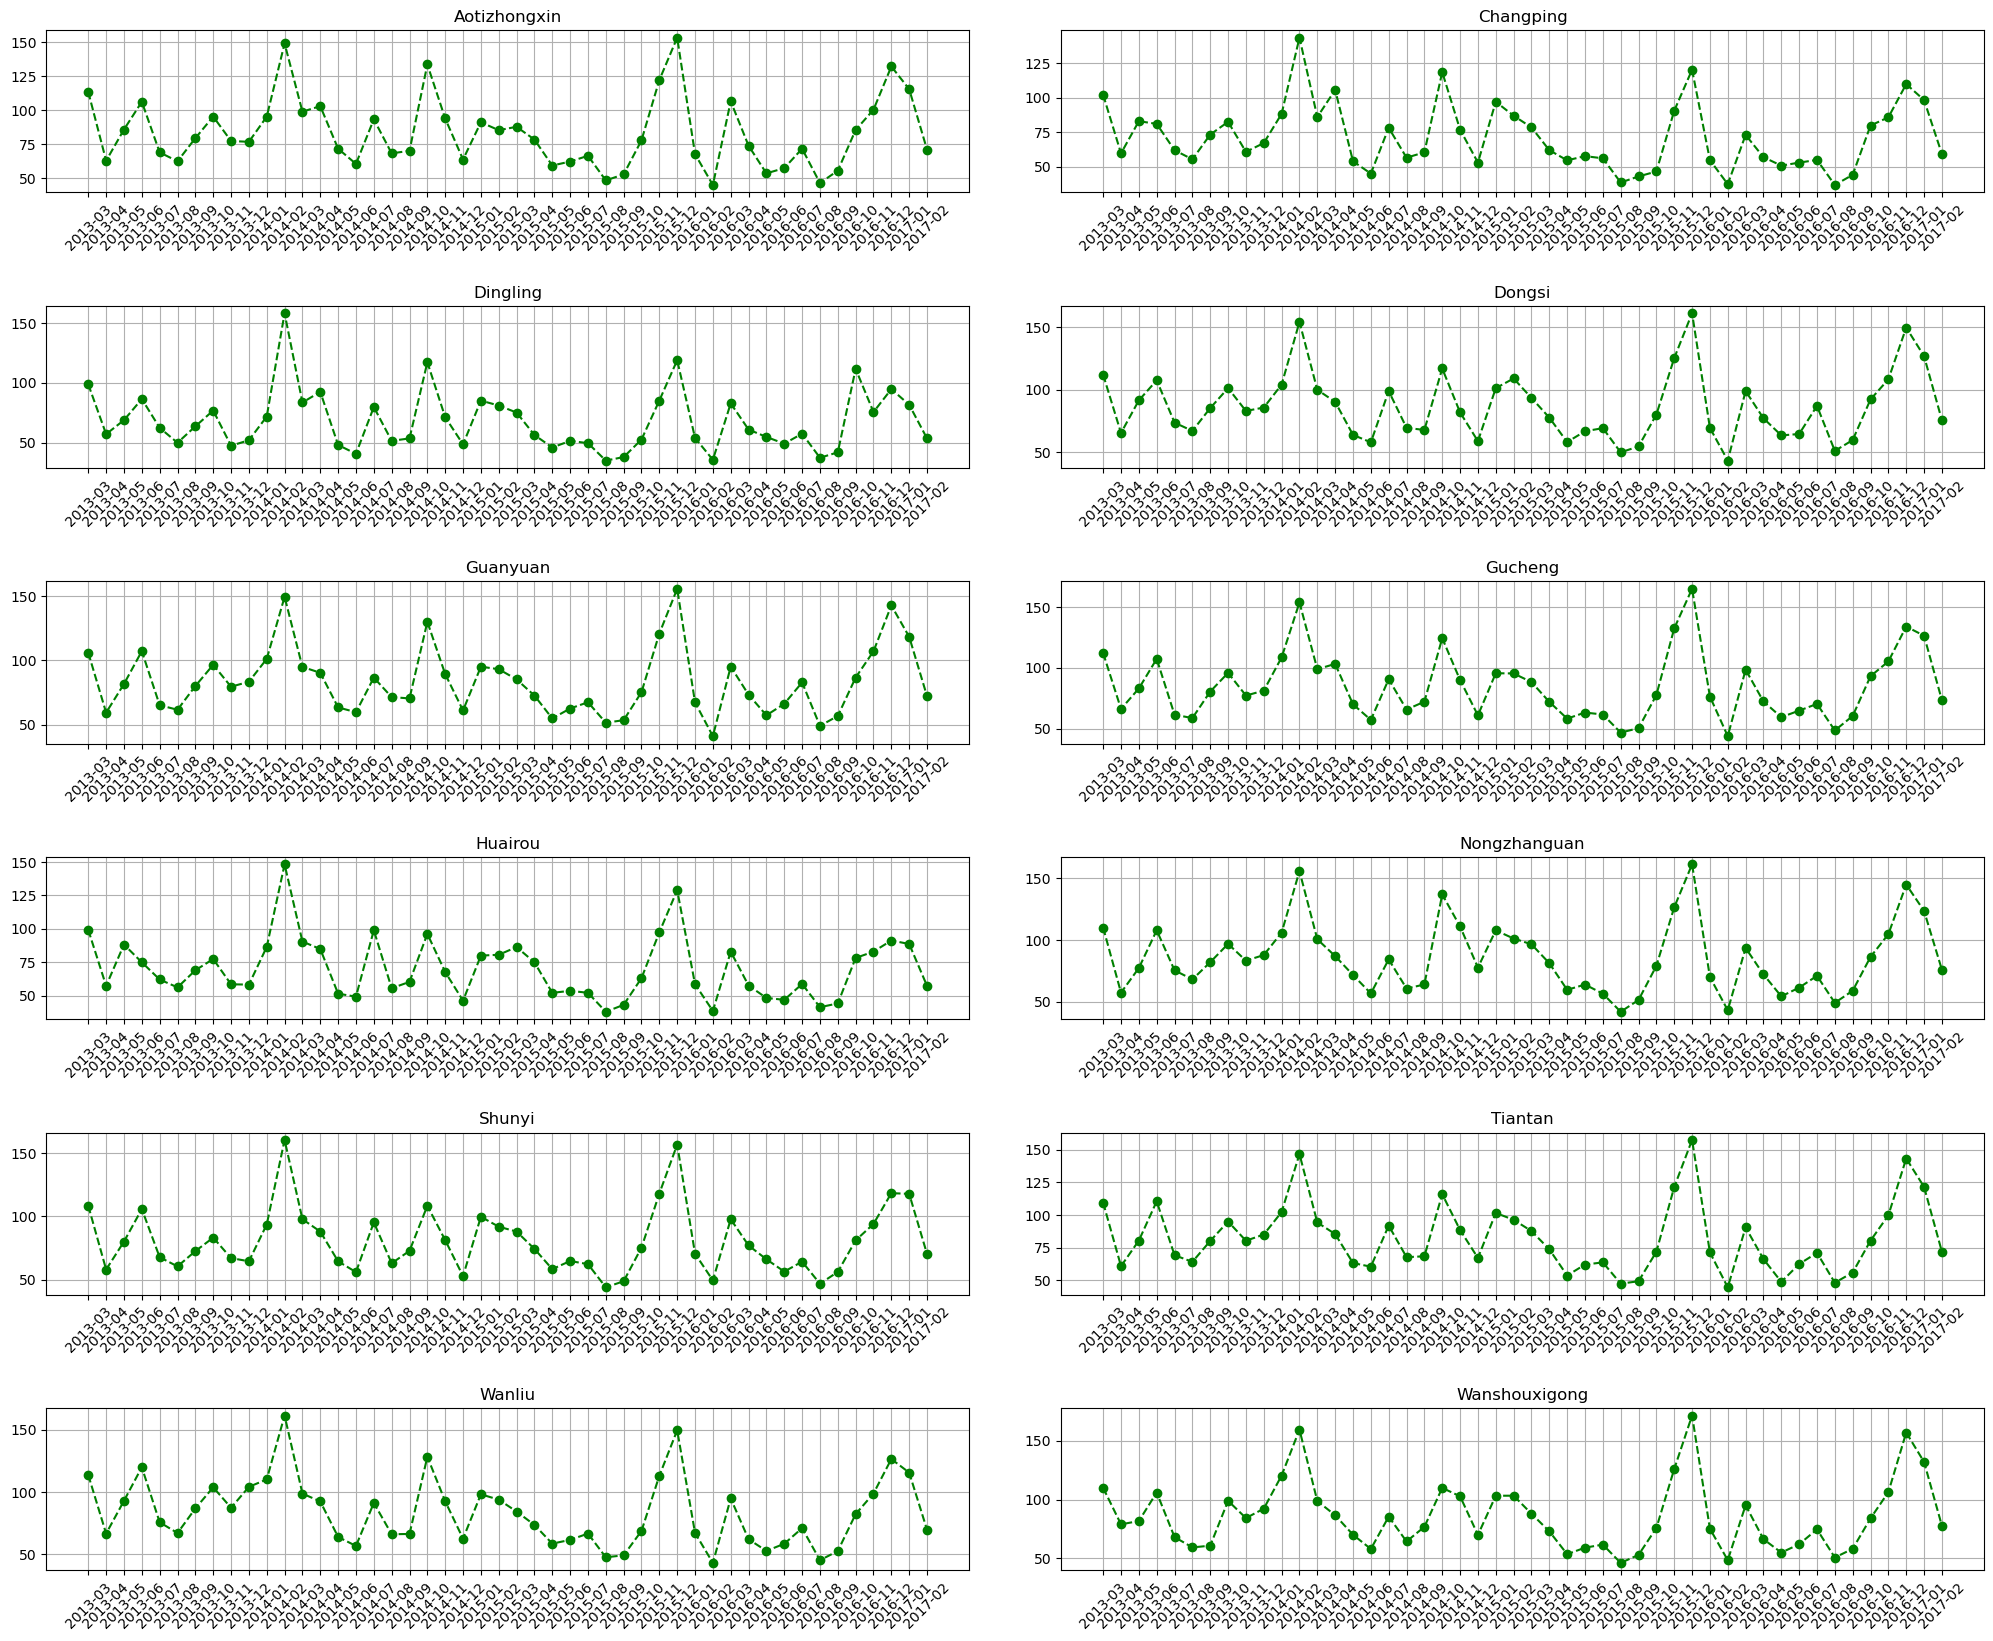

In [34]:
pert_1 = new_df.groupby(['station','year_month'])["PM2.5"].mean(numeric_only=True)

count_area = 0
fig, axs = plt.subplots(6,2,figsize=(25, 20))
fig.subplots_adjust(hspace=0.7, wspace=0.1)
for i in range(6):
    for j in range(2):
        area = data_area[count_area]
        axs[i,j].plot(pert_1[area].index,pert_1[area].values,'go--',label=area)
        axs[i,j].set_title(area)
        axs[i,j].tick_params(axis='x', rotation=45)
        axs[i,j].grid(axis="x")
        axs[i,j].grid(axis="y")
        count_area += 1

plt.show()

Berdasarkan hasil grafik tersebut kadar PM2.5 tertinggi banyak terjadi di bulan November 2015 yaitu pada kota Aotizhongxin, Dongsi, Guanyuan, Gucheng, Nongzhanguan, Tiantan, dan Wanshouxigong. Namun pada kota Changping, Dingling, Huairou, Shunyi, dan Wanliu memiliki kadar PM2.5 tertinggi di bulan Januari 2014.

Apabila diperhatikan lebih lanjut, pada grafik tersebut tidak menujukkan bahwa semakin ke waktu ke waktu tidak menurun untuk kadar PM2.5. Namun pada bulan Desember 2014 sampai Agustus 2015 terjadi penurunan kadar PM2.5.

### Pertanyaan 2: Bagaimana rata-rata perbulan dari kadar PM10 di masing-masing kota?

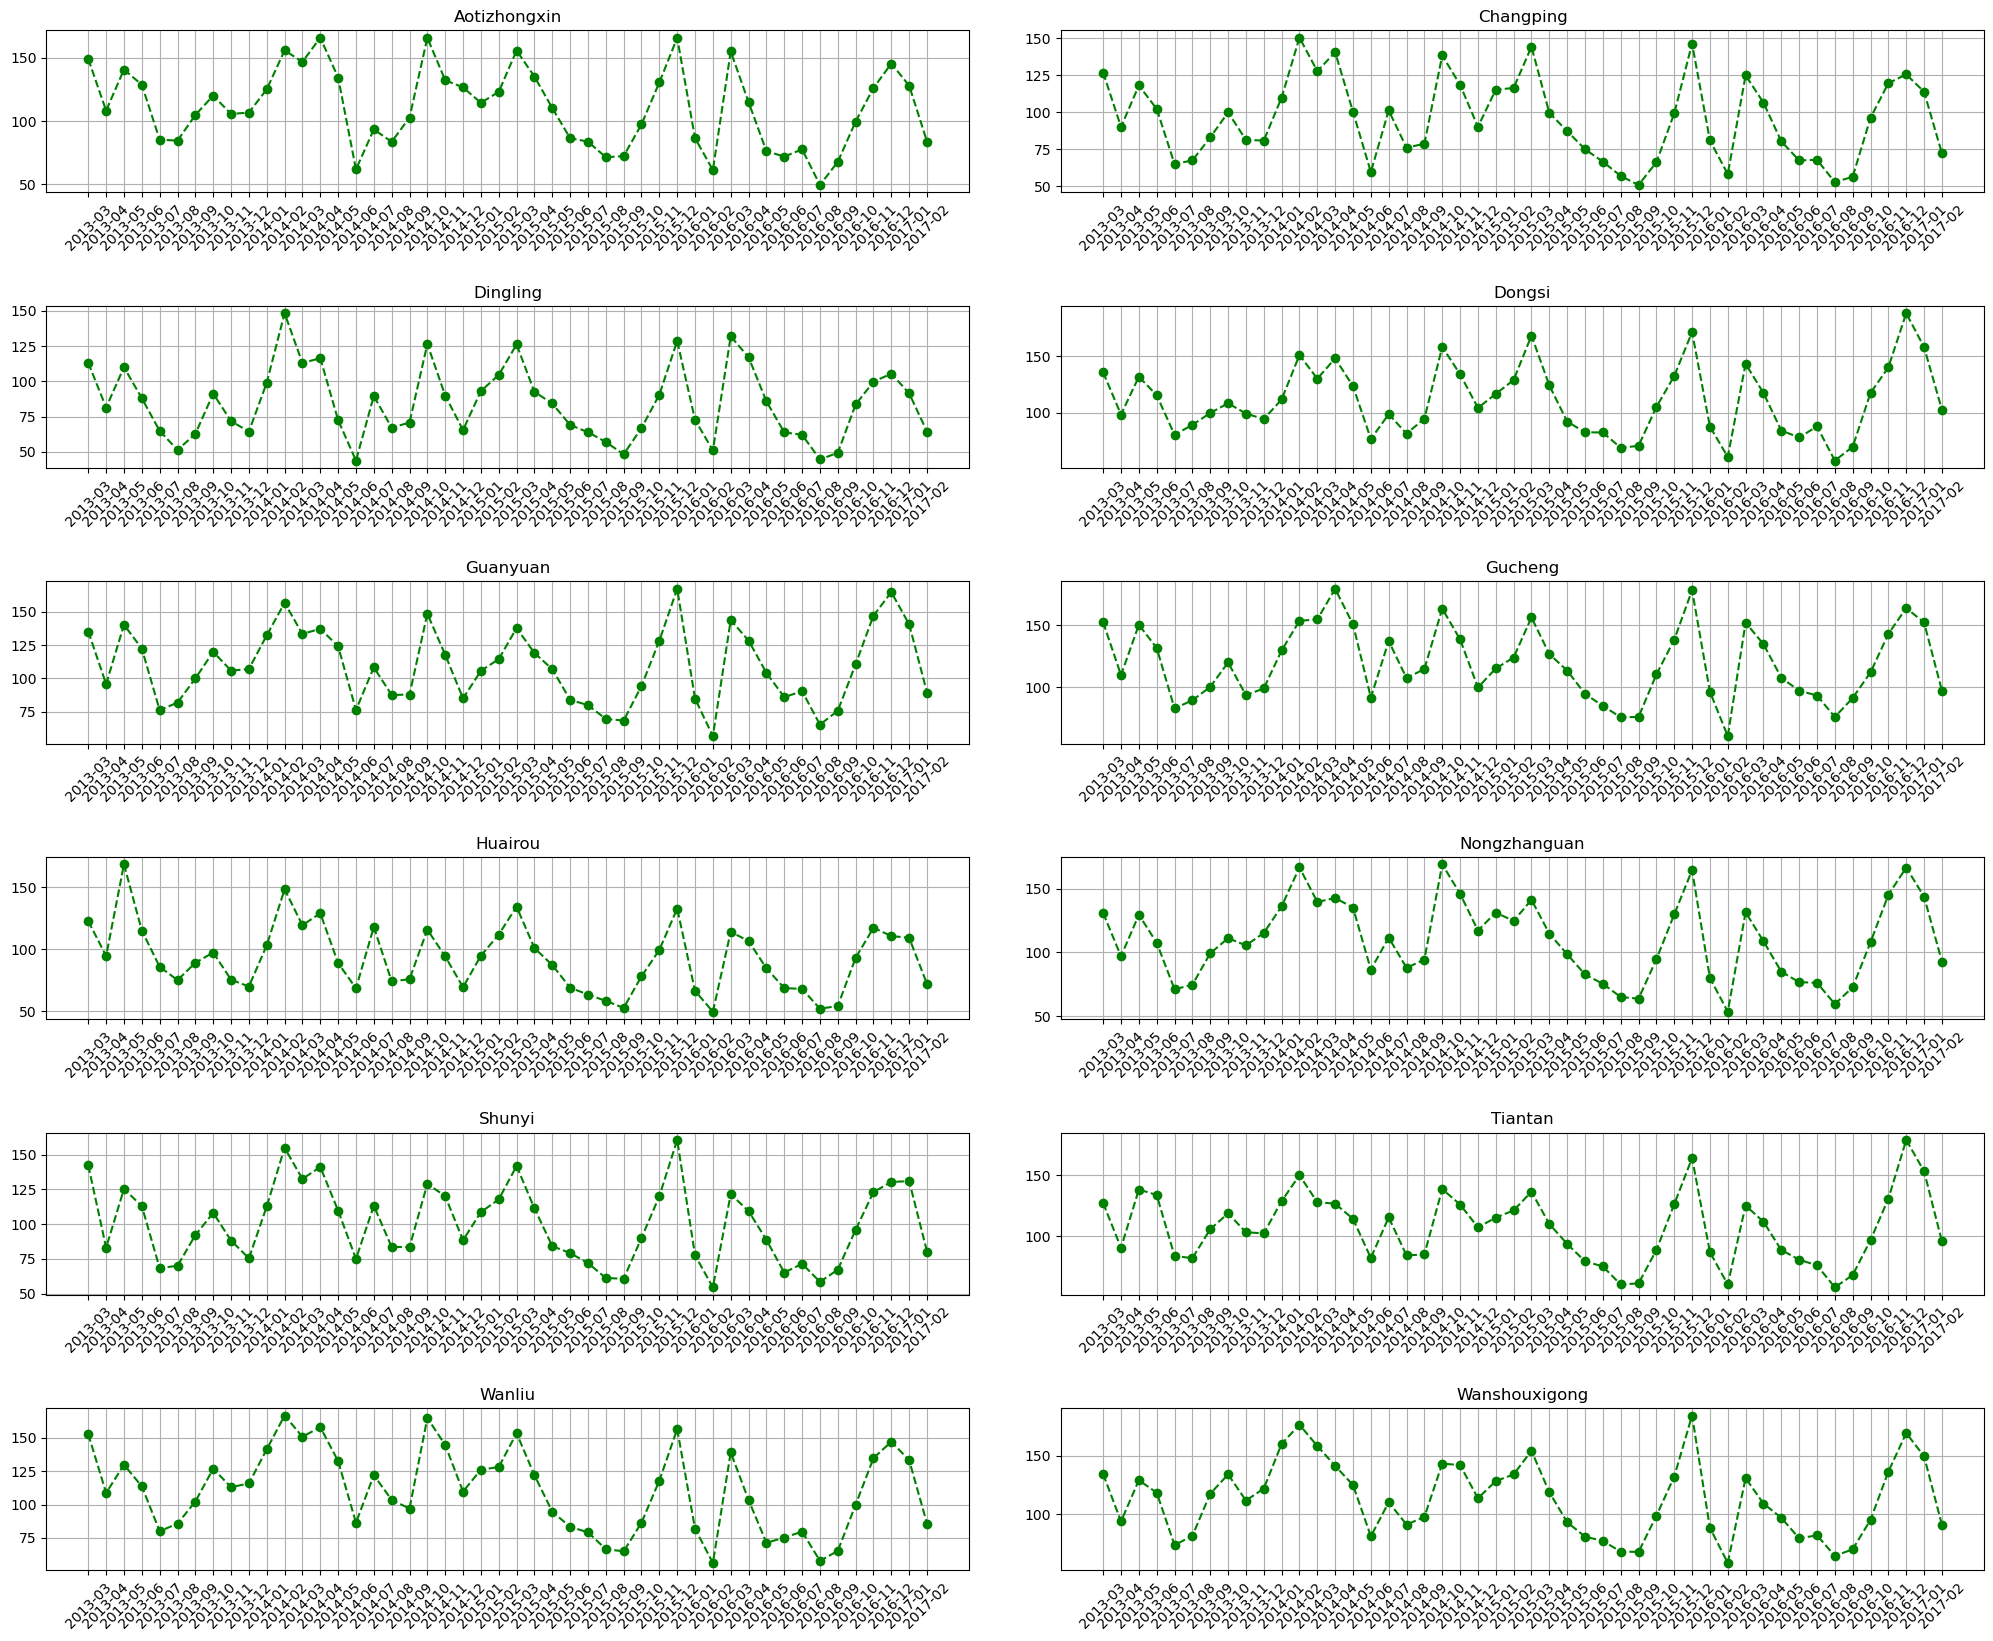

In [35]:
pert_2 = new_df.groupby(['station','year_month'])["PM10"].mean(numeric_only=True)

count_area = 0
fig, axs = plt.subplots(6,2,figsize=(25, 20))
fig.subplots_adjust(hspace=0.7, wspace=0.1)
for i in range(6):
    for j in range(2):
        area = data_area[count_area]
        axs[i,j].plot(pert_2[area].index,pert_2[area].values,'go--',label=area)
        axs[i,j].set_title(area)
        axs[i,j].tick_params(axis='x', rotation=45)
        axs[i,j].grid(axis="x")
        axs[i,j].grid(axis="y")
        count_area += 1

plt.show()

Berdasarkan grafik diatas juga terdapat wilayah yang memiliki kadar PM10 yang tinggi di tanggal November 2015, seperti di kota Guanyuan, Shunyi, dan Wanshouxigong. Di kota - kota lainnya kadar PM10 di udara cukup tinggi di bulan januari 2014 - februari 2014. Namun sama seperti kadar PM2.5 pada bulan Desember 2014 sampai Agustus 2015 terjadi penurunan kadar PM10 hampir di setiap kota.

### Pertanyaan 3: Kota mana yang memiliki kondisi kualitas udara yang paling buruk?

C:\Users\ghdeori2101\AppData\Local\Temp\1\ipykernel_6020\739892.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pert_3 = new_df.groupby(['station','year'])["PM2.5","PM10"].mean(numeric_only=True)
C:\Users\ghdeori2101\AppData\Local\Temp\1\ipykernel_6020\739892.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  axs[i,j].plot(pert_3.loc[area].index,pert_3.loc[area]["PM2.5"].values,'go--', color=color)
C:\Users\ghdeori2101\AppData\Local\Temp\1\ipykernel_6020\739892.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  axs[i,j].plot(pert_3.loc[area].index,pert_3.loc[area]["PM10"].values,'go--', color=color)


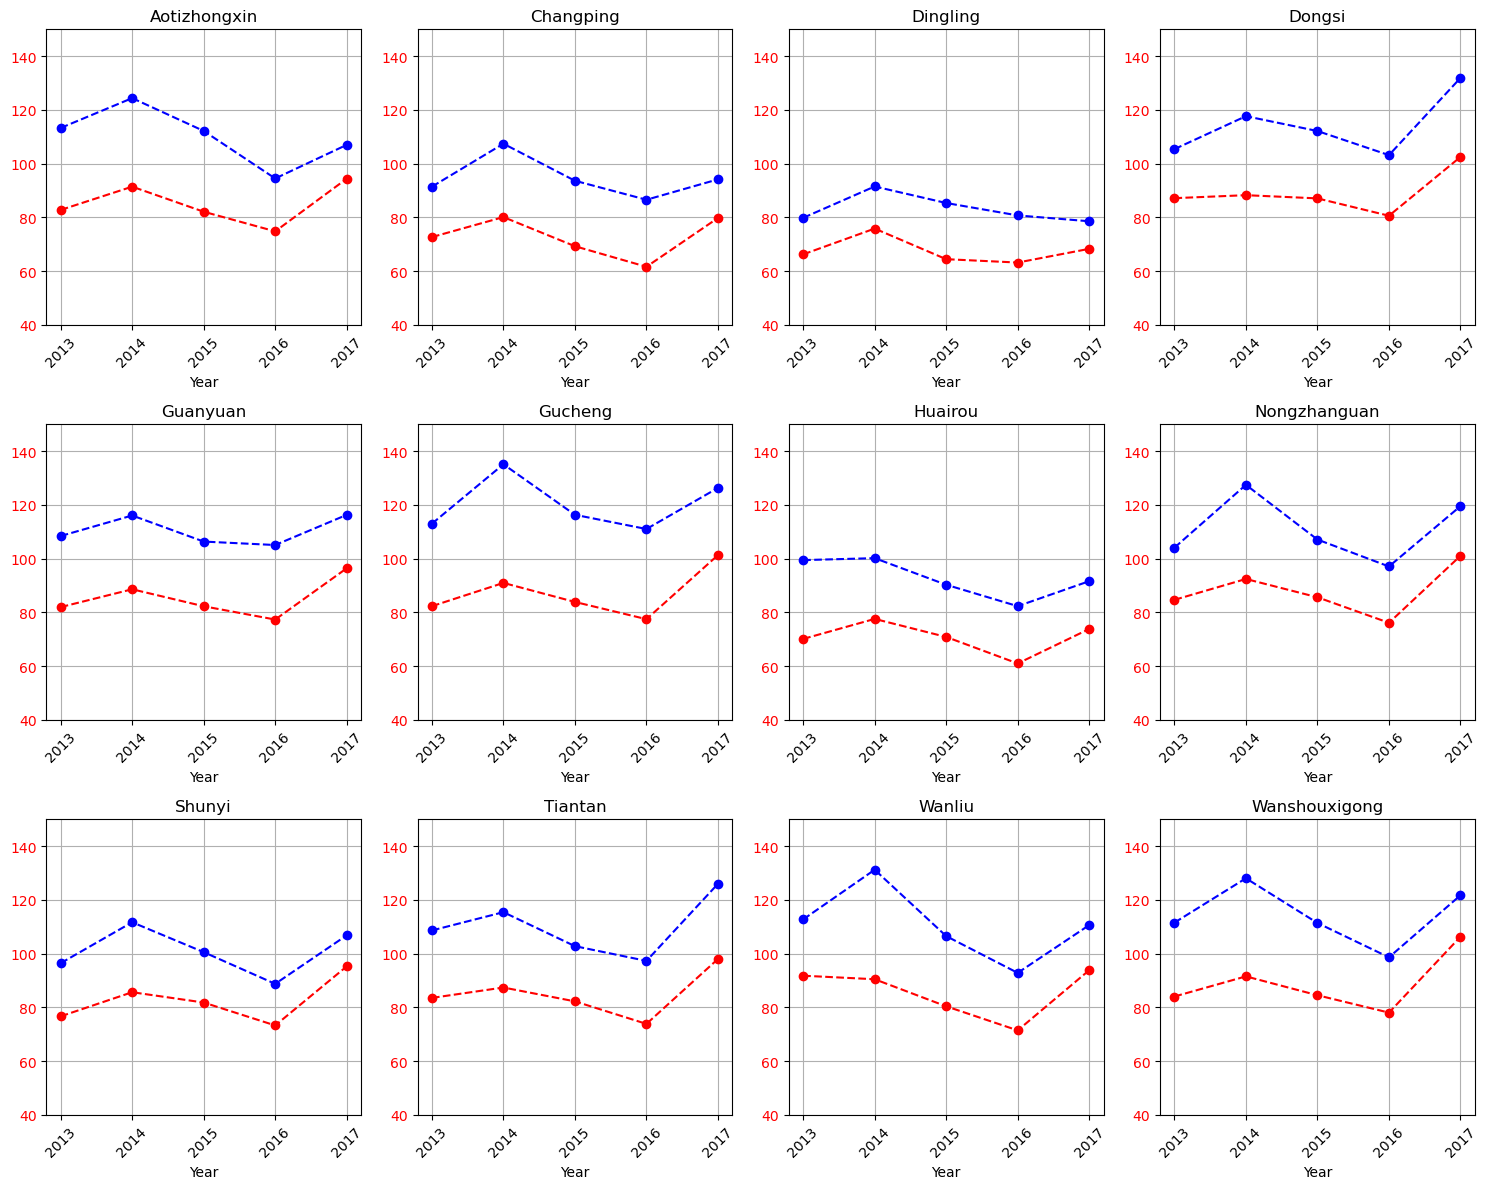

In [36]:
pert_3 = new_df.groupby(['station','year'])["PM2.5","PM10"].mean(numeric_only=True)

fig, axs = plt.subplots(3,4,figsize=(15,12))
fig.subplots_adjust(hspace=0.7, wspace=0.1)
count_area = 0
for i in range(3):
    for j in range(4):
        area = data_area[count_area]
        color = 'red'
        axs[i,j].set_xlabel('Year')
        axs[i,j].plot(pert_3.loc[area].index,pert_3.loc[area]["PM2.5"].values,'go--', color=color)
        axs[i,j].tick_params(axis='y', labelcolor=color)
        axs[i,j].tick_params(axis='x', rotation=45)
        axs[i,j].grid(axis="x")
        axs[i,j].grid(axis="y")
        axs[i,j].set_title(area)
        axs[i,j].set_ylim(40,150)


        # ax2 = axs[i,j].twinx()  # instantiate a second axes that shares the same x-axis

        color = 'blue'
        axs[i,j].plot(pert_3.loc[area].index,pert_3.loc[area]["PM10"].values,'go--', color=color)
        # axs[i,j].tick_params(axis='y', labelcolor=color)
        count_area += 1

fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.show()


Berdasarkan rata-rata per tahun dari kadar PM2.5 dan PM10 di udara, dapat dilihat bahwa pada kadar PM10 di udara yang terlihat lebih tinggi dari kota lain adalah kota Gucheng karena memiliki kadar PM10 yang tidak jauh dari 120, begitupun juga dengan kota Guanyuan dan Nongzhanguan. Pada PM2.5 Guanyuan, Nongzhanguan, dan Wanshouxigong hasilnya cukup mirip - mirip. Kota Guanyuan dan Nongzhanguan dapat dikatakan menjadi kota yang memiliki kualitas udara yang buruk apabila dilihat dari kadar PM2.5 dan PM10. Pada kota DIngling memiliki kadar PM2.5 dan PM10 yang paling rendah dibandingkan dengan kota - kota lainnya.

C:\Users\ghdeori2101\AppData\Local\Temp\1\ipykernel_6020\2356003033.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  axs[i,j].plot(pert_3_1.loc[area].index,pert_3_1.loc[area].values,'go--',label=area, color=color)


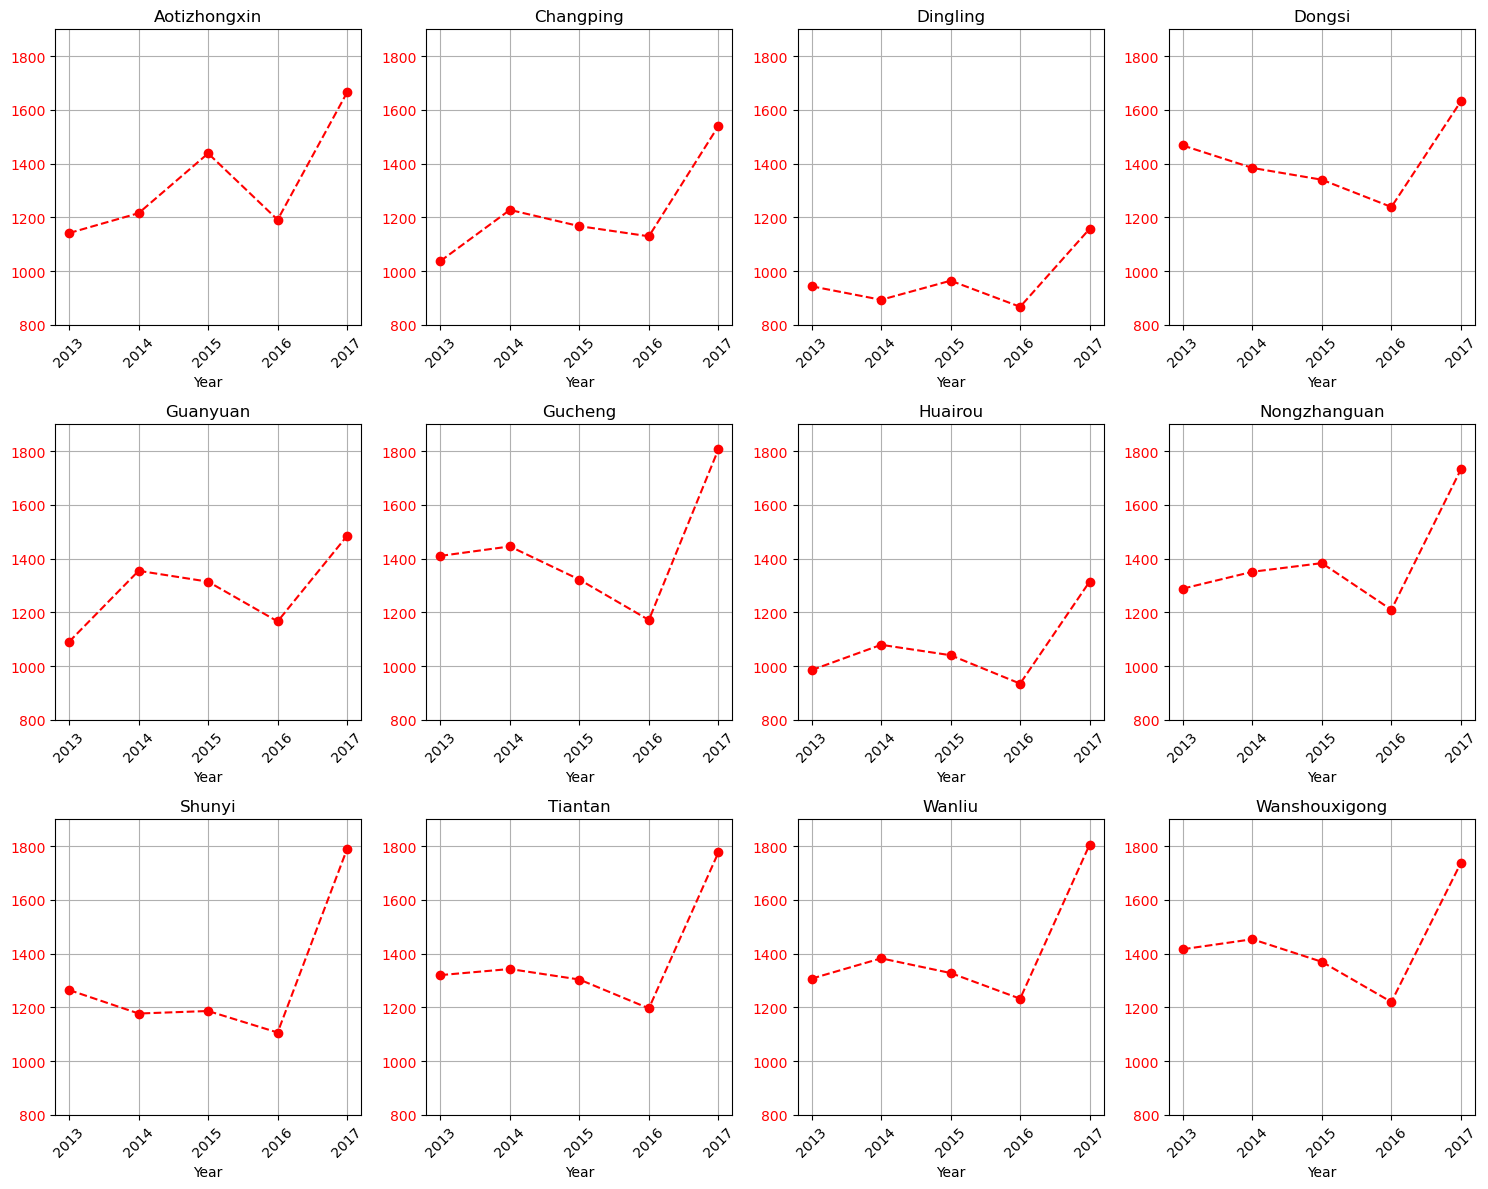

In [37]:
pert_3_1 = new_df.groupby(['station','year'])["CO"].mean(numeric_only=True)

fig, axs = plt.subplots(3,4,figsize=(15,12))
fig.subplots_adjust(hspace=0.7, wspace=0.1)
count_area = 0
for i in range(3):
    for j in range(4):
        area = data_area[count_area]
        color = 'red'
        axs[i,j].set_xlabel('Year')
        axs[i,j].plot(pert_3_1.loc[area].index,pert_3_1.loc[area].values,'go--',label=area, color=color)
        axs[i,j].tick_params(axis='y', labelcolor=color)
        axs[i,j].tick_params(axis='x', rotation=45)
        axs[i,j].grid(axis="x")
        axs[i,j].grid(axis="y")
        axs[i,j].set_title(area)
        axs[i,j].set_ylim(800,1900)
        count_area += 1

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


Dilihat dari kadar CO pada udara kota Gucheng, Shunyi, Nongzhanguan, dan Tiantan memiliki kadar CO yang cukup tinggi dari 2013 - 2017 dibandingkan dengan kota - kota lainnya. Pada kota Dingling terlihat bahwa kadar CO dalam udara dari tahun ke tahun termasuk yang paling rendah dibandingkan dengan kota - kota lainnya.

Kadar SO2


C:\Users\ghdeori2101\AppData\Local\Temp\1\ipykernel_6020\3001710480.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  axs[i,j].plot(pert_3_2.loc[area].index,pert_3_2.loc[area].values,'go--',label=area, color=color)


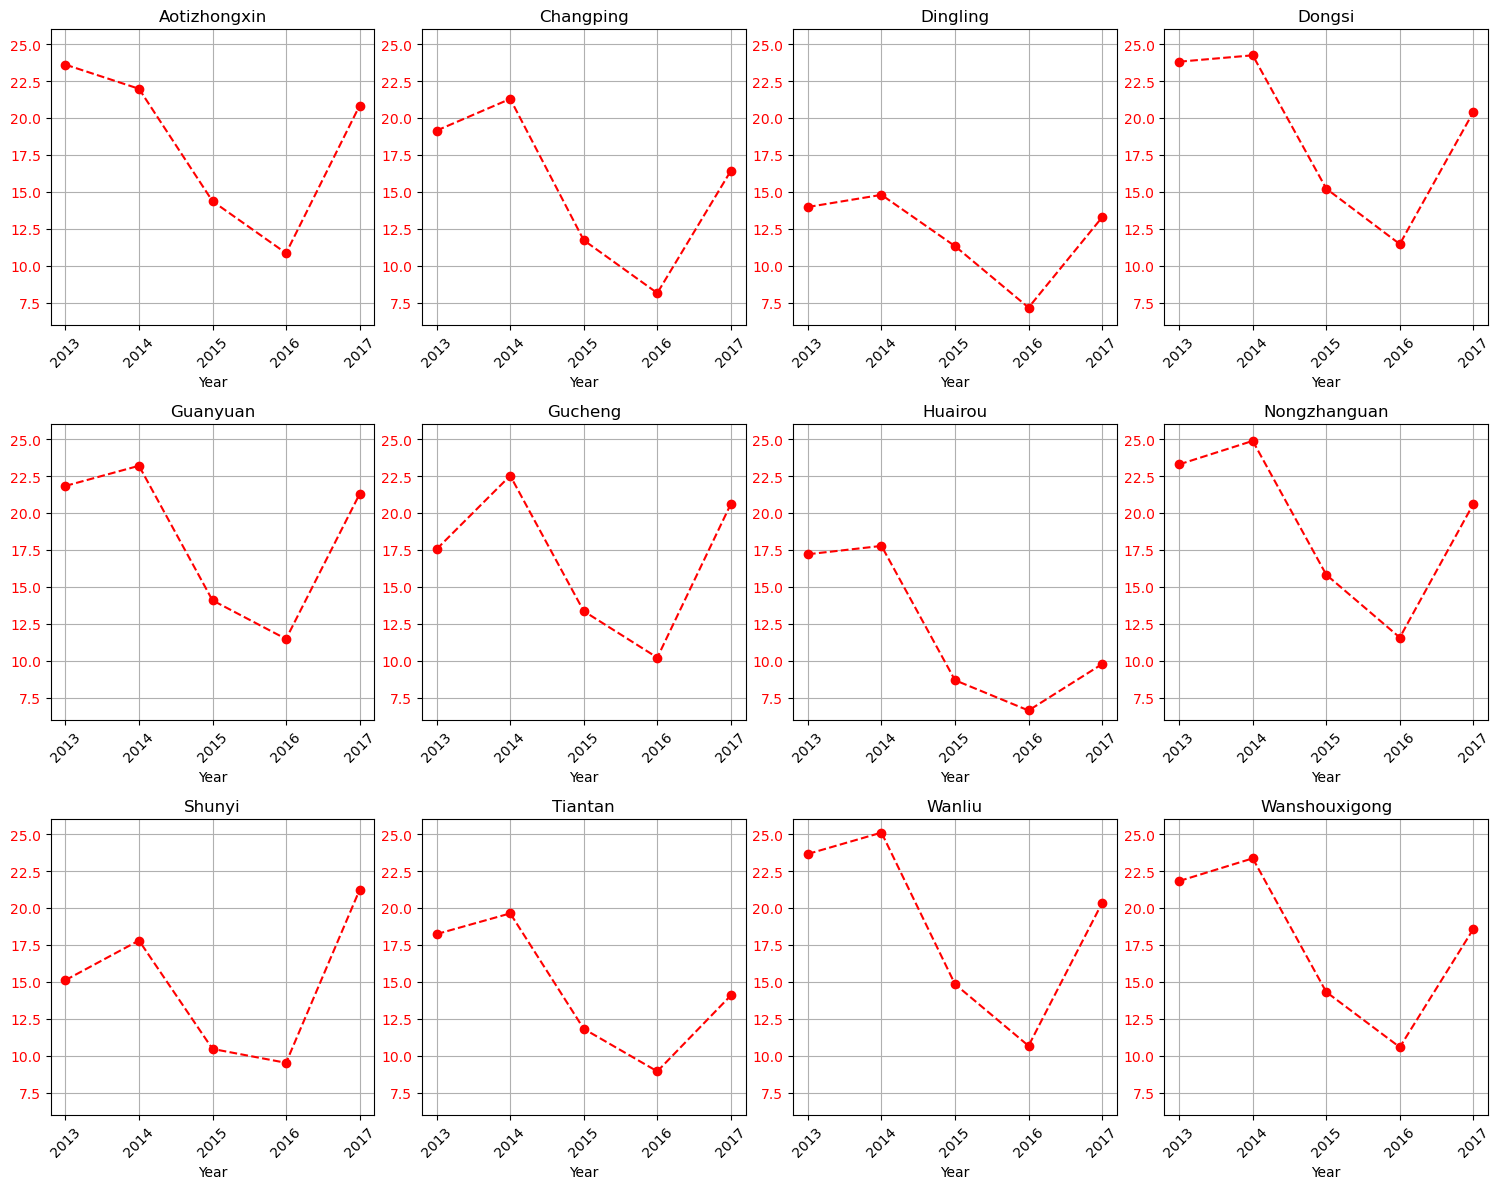

In [38]:
pert_3_2 = new_df.groupby(['station','year'])["SO2"].mean(numeric_only=True)

fig, axs = plt.subplots(3,4,figsize=(15,12))
fig.subplots_adjust(hspace=0.7, wspace=0.1)

print("Kadar SO2")
count_area = 0
for i in range(3):
    for j in range(4):
        area = data_area[count_area]
        color = 'red'
        axs[i,j].set_xlabel('Year')
        axs[i,j].plot(pert_3_2.loc[area].index,pert_3_2.loc[area].values,'go--',label=area, color=color)
        axs[i,j].tick_params(axis='y', labelcolor=color)
        axs[i,j].tick_params(axis='x', rotation=45)
        axs[i,j].grid(axis="x")
        axs[i,j].grid(axis="y")
        axs[i,j].set_title(area)
        axs[i,j].set_ylim(6,26)
        count_area += 1

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


Berdasarkan kadar SO2, kota Guanyuan, Nongzhanguan, Wanliu, dan Wanshouxigong terbilang cukup tinggi. Terlihat pada tahun 2013 di kota = kota tersebut memiliki kadar SO2 dalam udara lebih dari 20 ug/m^3. Selain itu, pada kota tersebut juga pada tahun 2024 kadar SO2 lebih dari 22.5 ug/m^3, sehingga 4 kota tersebut tergolong tinggi untuk kadar SO2. Pada kota Dingling memiliki kadar SO2 yang paling rendah dibandingkan dengan kota - kota lainnya.


Berdasarkan kadar PM2.5, PM10, CO, dan SO2, berdasarkan grafik kota - kota yang memiliki kualitas udara yang buruk adalah kota Wanshouxigong.

### Pertanyaan 4: Bagaimana pengaruh arah angin dengan kadar PM2.5 di awal tahun 2017 di kota Wanshouxigong?

In [39]:
year_2017 = new_df.loc[new_df["year"] == 2017,["PM2.5","wd","station","date_hour","date"]]

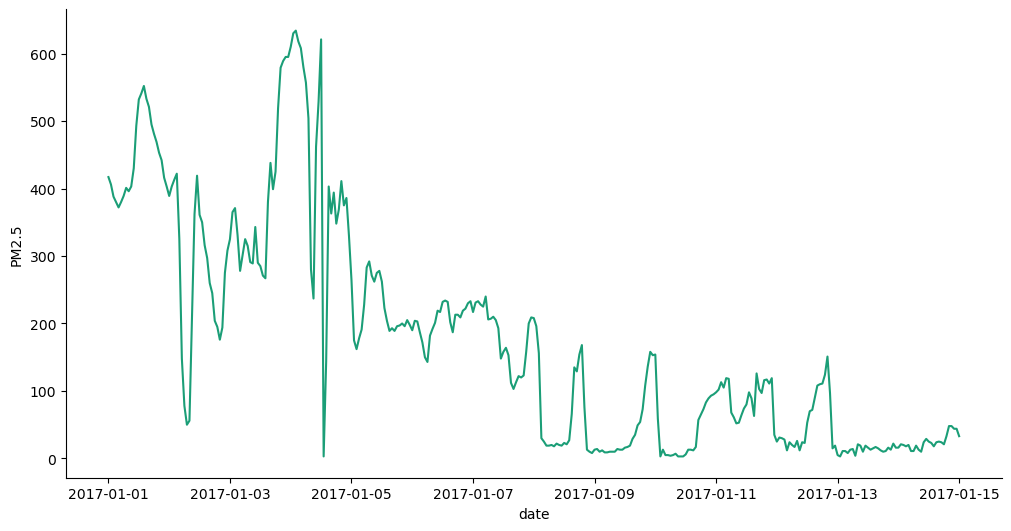

In [40]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['date_hour']
    ys = series['PM2.5']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

area = "Wanshouxigong"
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
pert_4_ = year_2017.loc[year_2017["station"]==area][:24*14+1]
_plot_series(pert_4_, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('PM2.5')

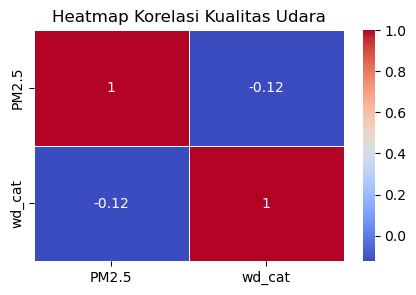

In [41]:
lib_wd = {
    'E':1,
    'ENE':2,
    'ESE':3,
    'N':4,
    'NE':5,
    'NNE':6,
    'NNW':7,
    'NW':8,
    'S':9,
    'SE':10,
    'SSE':11,
    'SSW':12,
    'SW':13,
    'W':14,
    'WNW':15,
    'WSW':16
}

year_2017['wd_cat'] = year_2017['wd'].apply(lambda x: lib_wd[x])

plt.figure(figsize=(5, 3))
sns.heatmap(year_2017.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Kualitas Udara')
plt.show()

Berdasarkan data 14 hari pertama dari tahun 2017, dapat dilihat korelasi antara arah mata angin dengan kadar PM2.5 di kota Wanshouxigong memiliki korelasi negatif yang lemah. Hal ini dikatakan lemah karena nilai dari korelasi hanya 0.12 yang mana kurang dari 0.5.

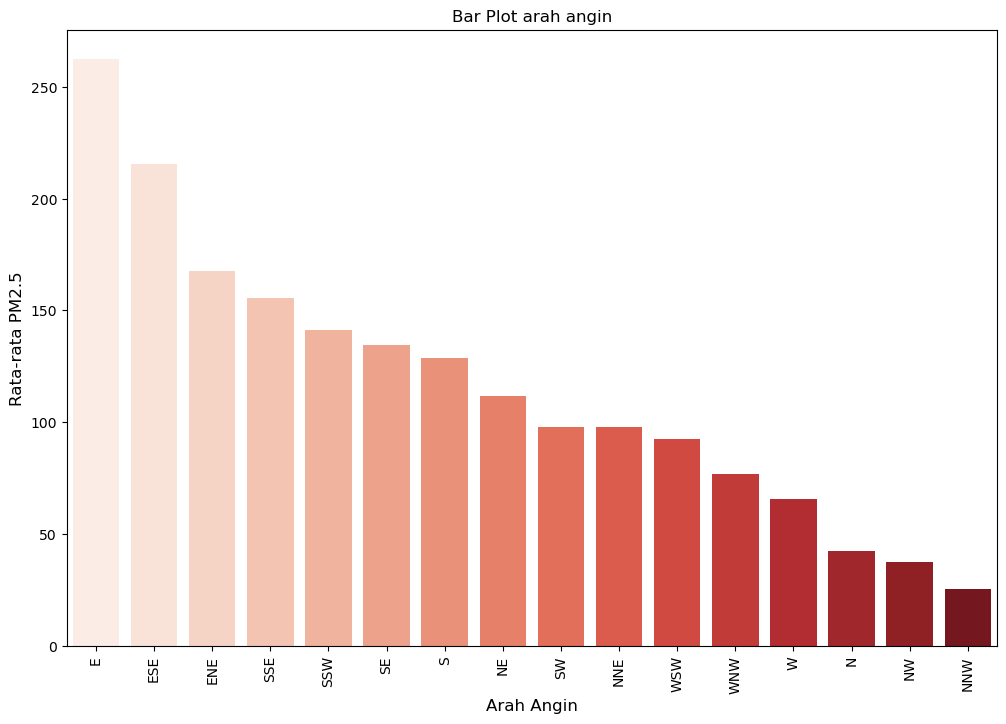

In [42]:
area = "Wanshouxigong"
pert_4_ = year_2017.loc[year_2017["station"]==area]

pert_4 = pd.pivot_table(pert_4_,columns='wd',index='station',values='PM2.5',aggfunc='mean').T.sort_values('Wanshouxigong',ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=pert_4.index, y='Wanshouxigong', data=pert_4, palette='Reds')
plt.ylabel('Rata-rata PM2.5', fontsize=12)
plt.xlabel('Arah Angin', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Bar Plot arah angin')
plt.show()

Apabila dilihat dari rata-rata kadar PM2.5 di masing - masing arah angin, dapat dikatakan bahwa arah angin E (East) mengandung paling banyak kadar PM2.5 di kota Wanshouxigong.

### Pertanyaan 5: Rata-rata kadar PM2.5 paling tinggi terjadi di hari apa di setiap kota?

In [43]:
pert_5_df = new_df[["year","PM2.5","RAIN","station","hari"]]
pert_5_df = pert_5_df.loc[pert_5_df["year"] >= 2016]

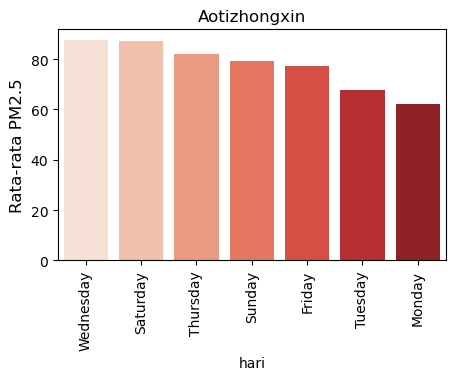

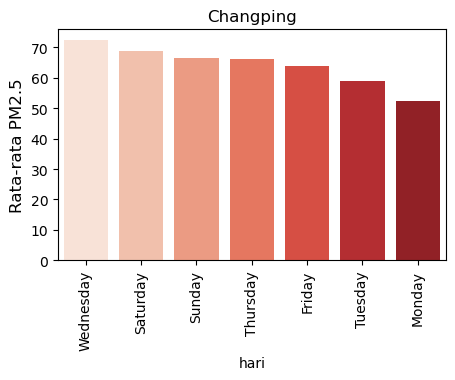

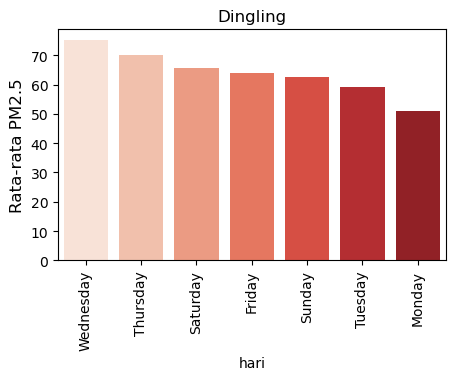

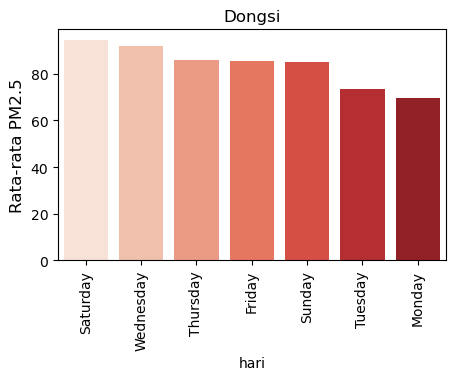

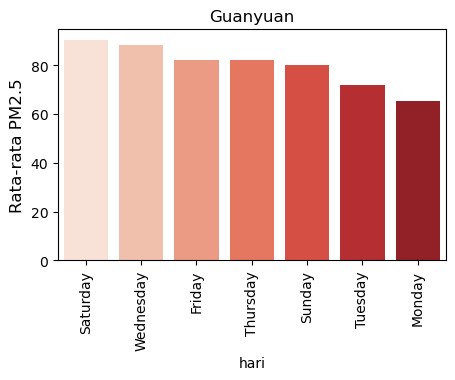

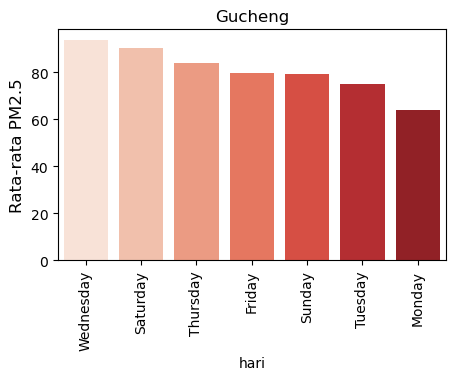

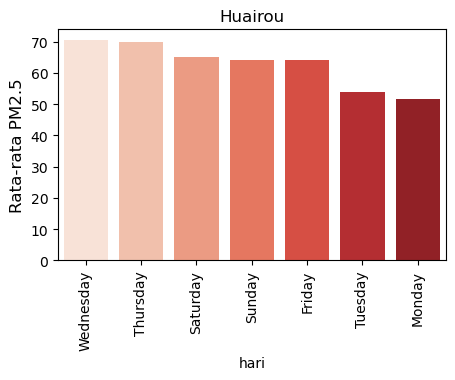

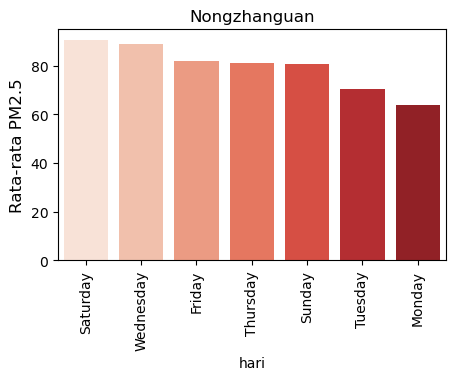

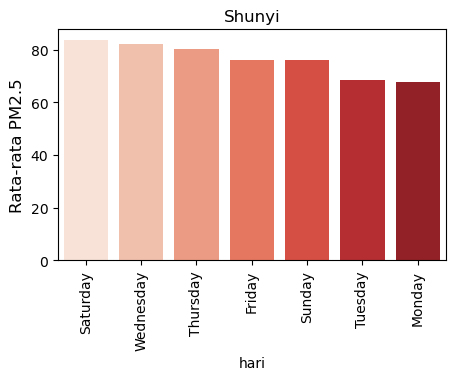

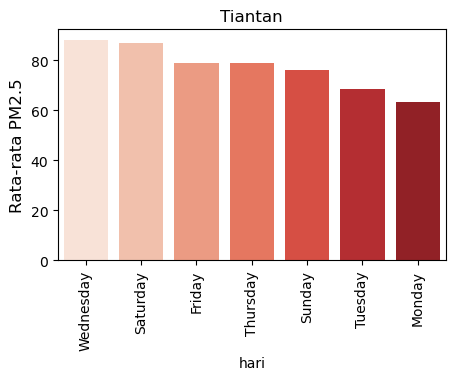

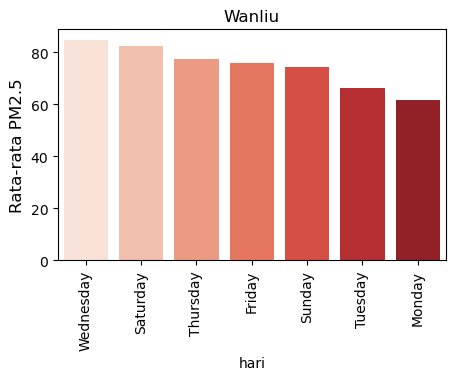

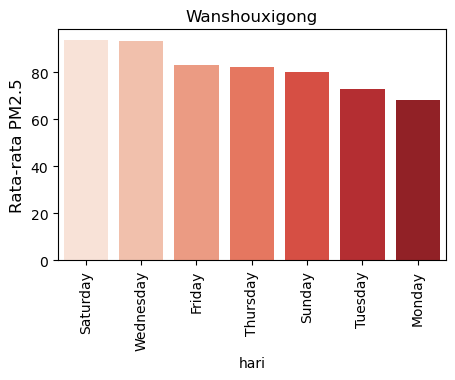

In [44]:
piv_5_df = pd.pivot_table(pert_5_df,columns='hari',index='station',values='PM2.5',aggfunc='mean').T


for area in data_area:
    piv_5_df = piv_5_df.sort_values(area,ascending=False)
    plt.figure(figsize=(5, 3))
    sns.barplot(x=piv_5_df.index, y=area, data=piv_5_df, palette='Reds')
    plt.ylabel('Rata-rata PM2.5', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title(area)
plt.show()

Berdasarkan grafik tersebut terlihat selama 1 tahun terakir bahwa tingginya tingkat PM2.5 terjadi di hari sabtu atau rabu. Pada hari minggu selamat 1 tahun terakhir rata-rata PM2.5 di semua kota termasuk yang paling rendah.

### Pertanyaan 6: Bagaimana cara mengurangi kadar PM2.5 pada udara?

In [45]:
pert_6_ = new_df.loc[new_df['date'] >= "2016-12-01"]

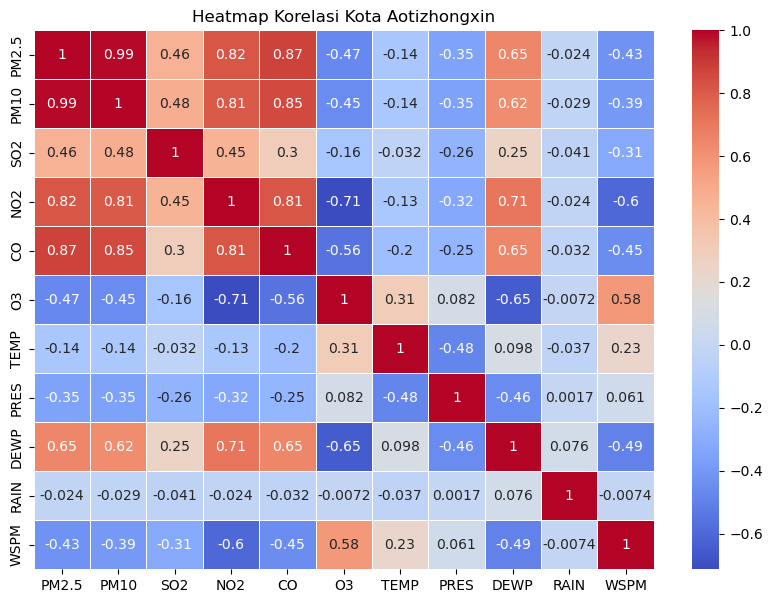

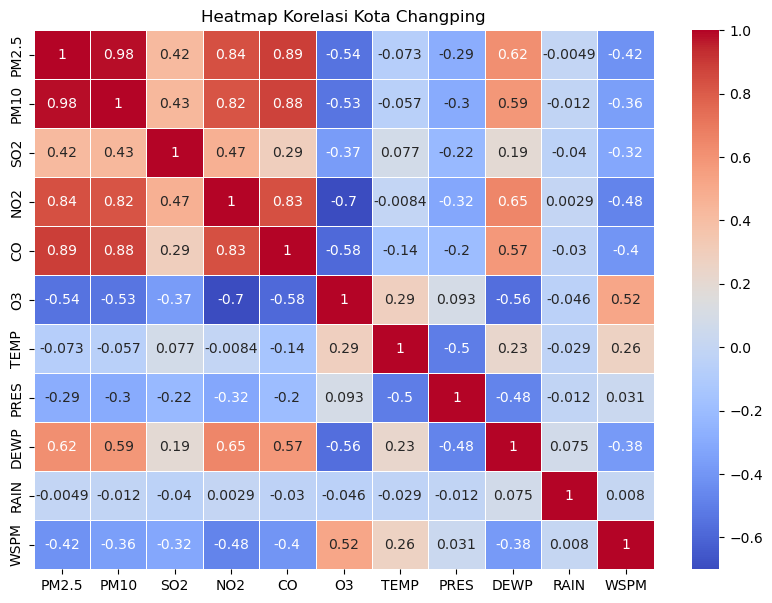

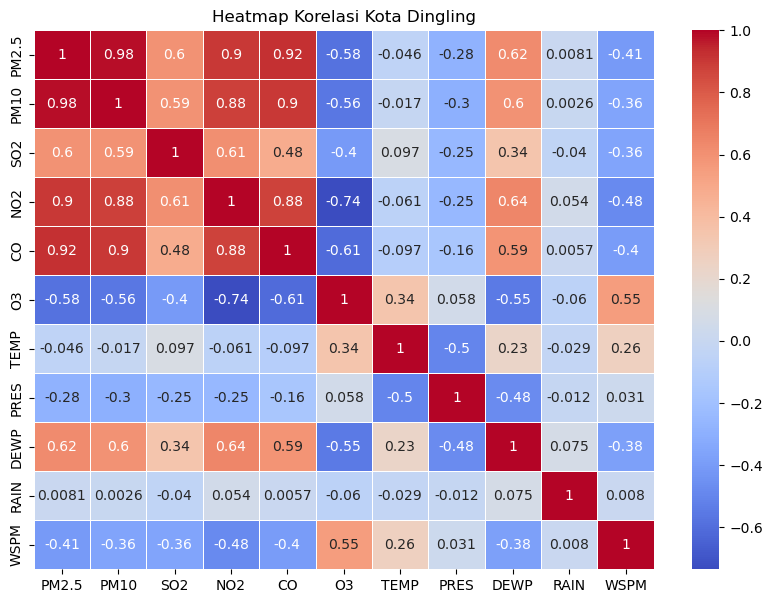

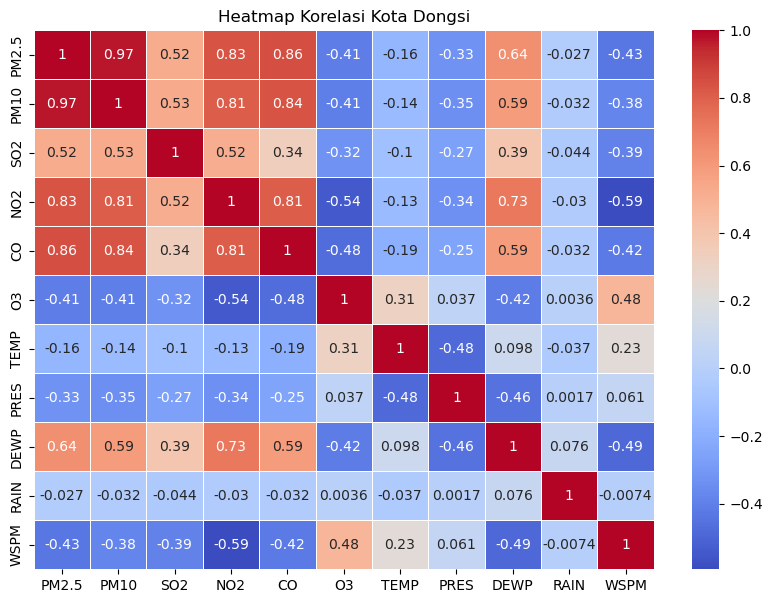

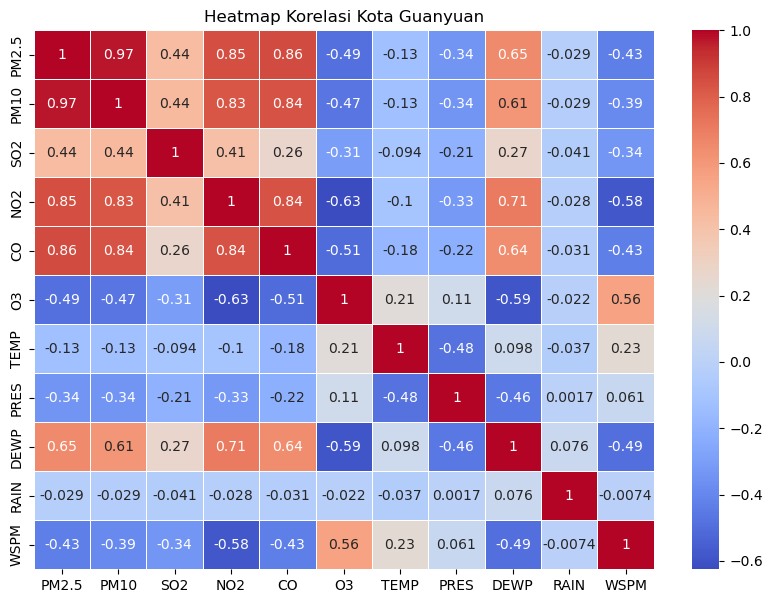

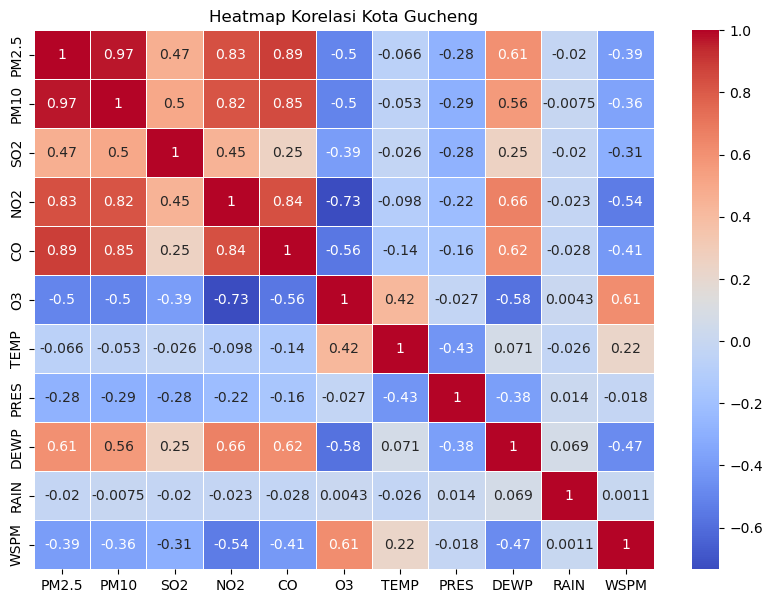

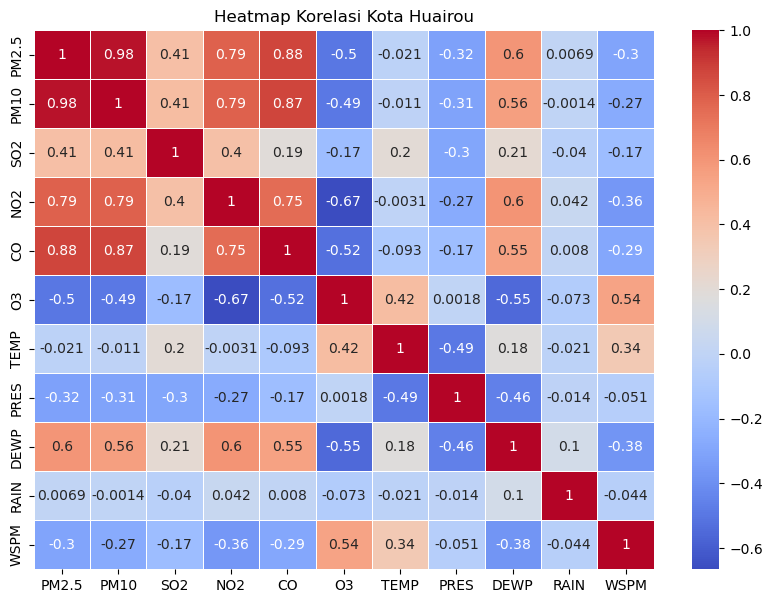

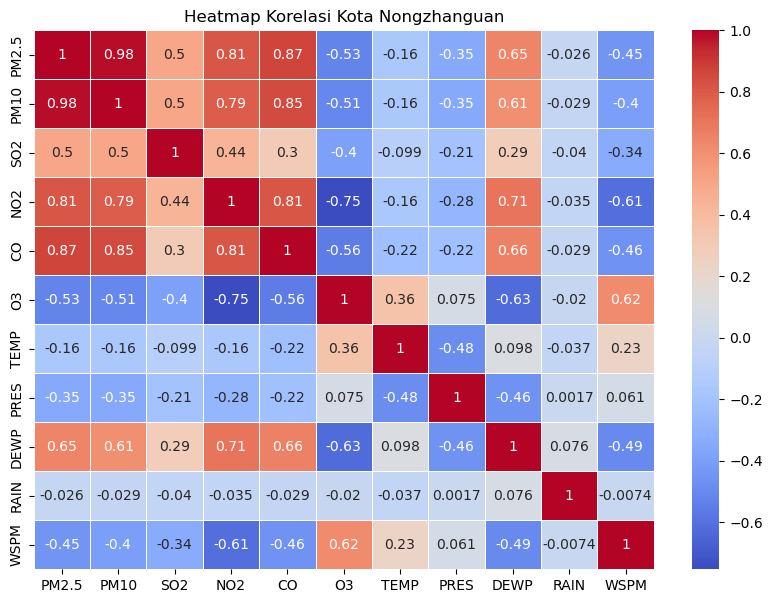

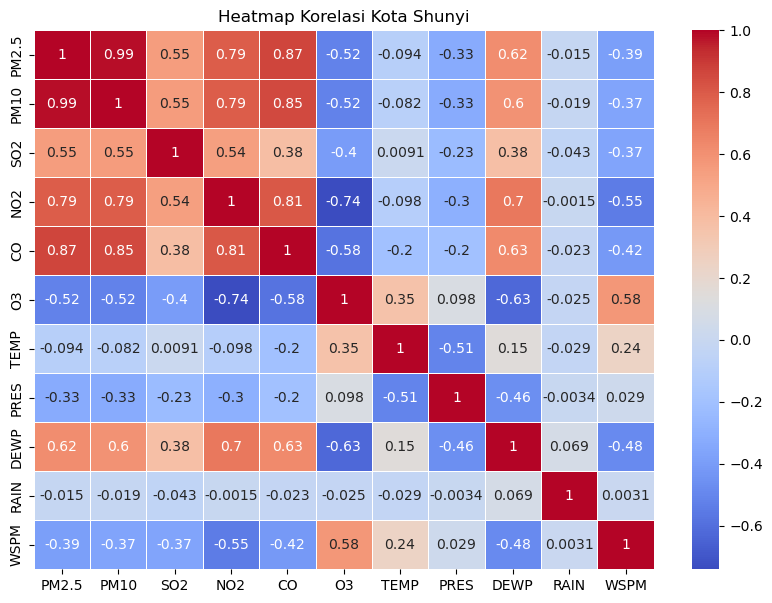

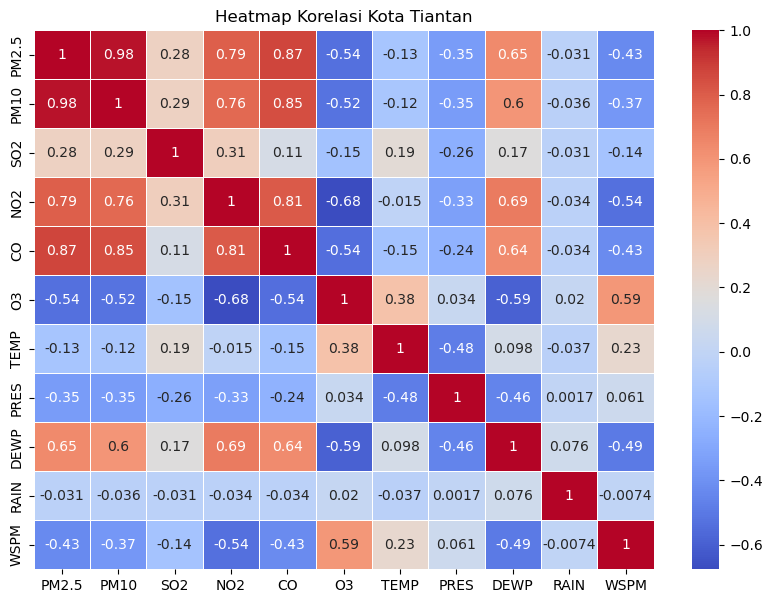

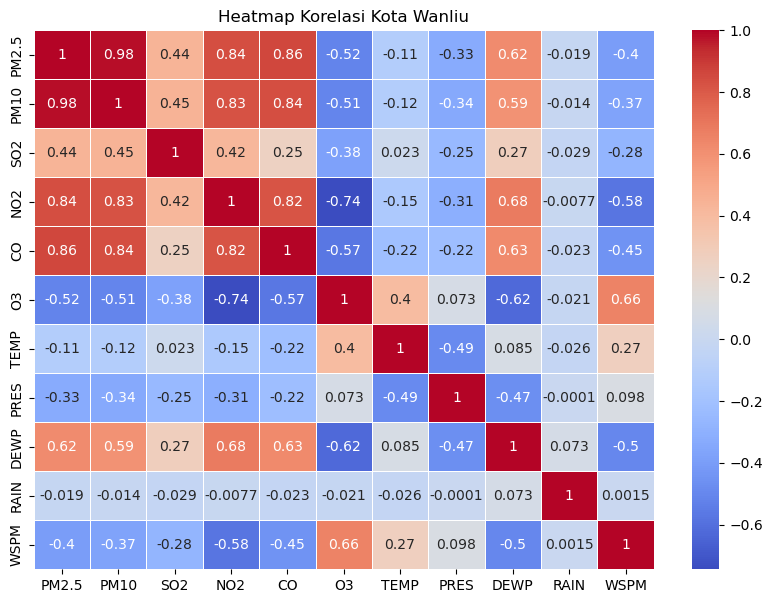

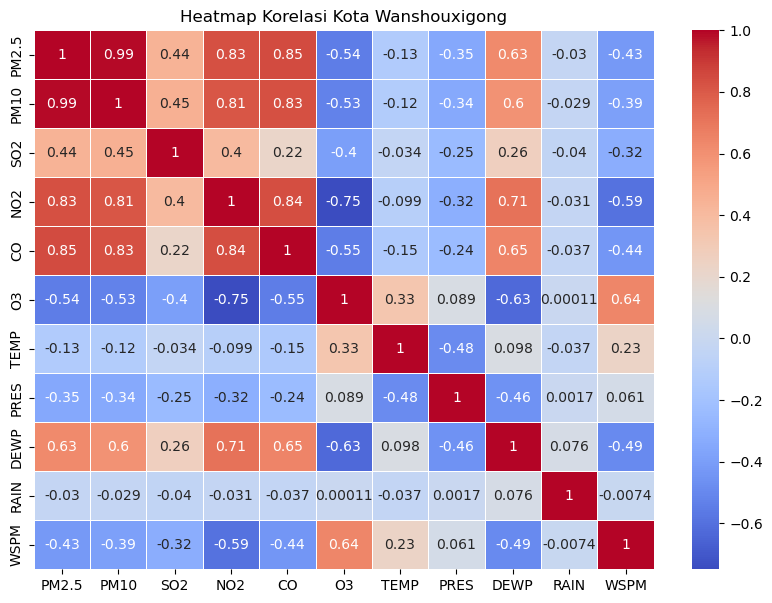

In [46]:
for area in data_area:
    plt.figure(figsize=(10, 7))
    sns.heatmap(pert_6_.loc[pert_6_['station']==area,['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Heatmap Korelasi Kota {area}')
plt.show()

Berdasarkan hasil korelasi setiap variabel pengukuran dapat dilihat bahwa dalam 3 bulan terakhir curah hujan tidak berpengaruh besar terhadap kadar PM2.5. Hal ini dapat dilihat dengan korelasi antara variabel RAIN dengan PM2.5 mendekati 0. Selain itu, dapat diperharikan juga PM10 memiliki korelasi positif sangat kuat dengan kadar PM2.5 di setiap kotanya. Begitu juga dengan kadar NO2 dan CO dalam udara juga memiliki korelasi positif yang kuat juga pada pengaruh PM2.5, namun untuk kadar SO2 dalam udara memiliki pengaruh positif yang tidak terlalu kuat. Kadar SO2 di kota Tiantin memiliki korelasi yang cukup lemah terhadap kadar PM2.5 dalam udara.

## Conclusion

### Pertanyaan 1: Bagaimana rata-rata perbulan dari kadar PM2.5 di masing-masing kota?

Berdasarkan data yang dimiliki dari tahun 2013 sampai februari 2017 dapat dilihat bahwa pada bulan Januari 2014 dan November 2015 di setiap kota terdapat lonjakan kadar PM2.5. Kadar PM2.5 tertinggi pada bulan November 2015 terjadi di kota Aotizhongxin, Dongsi, Guanyuan, Gucheng, Nongzhanguan, Tiantan, dan Wanshouxigong, namun pada kota Changping, Dingling, Huairou, Shunyi, dan Wanliu memiliki kadar PM2.5 tertinggi di bulan Januari 2014.


### Pertanyaan 2: Bagaimana rata-rata perbulan dari kadar PM10 di masing-masing kota?

Berdasarkan data yang dimiliki puncak dari kadar PM10 di setiap kota terjadi secara random. Apabila dilihat di bulan yang sama saat terjadi lonjakan kadar PM2.5 yaitu pada bulan Februari 2014 dan November 2015, kadar PM10 di udara juga meningkat di setiap kota.

### Pertanyaan 3: Kota mana yang memiliki kondisi kualitas udara yang paling buruk?

Berdasarkan rata-rata tahunan kadar PM2.5 dan PM10 yang tinggi dari tahun ke tahun adalah kota Guanyuan dan Nongzhanguan. Berdasarkan kadar CO, kota Gucheng, Shunyi, Nongzhanguan, dan Tiantan memiliki kadar yang tinggi, selain itu kota Guanyuan, Nongzhanguan, Wanliu, dan Wanshouxigong terbilang cukup tinggi juga untuk kadar SO2. Kesimpulan yang diperoleh adalah kota Nongzhanguan memiliki kualitas udara yang buruk karena memiliki kadar PM2.5, PM10, SO2, dan CO yang tinggi di tiap tahunnya.

### Pertanyaan 4: Bagaimana pengaruh arah angin dengan kadar PM2.5 di awal tahun 2017 di kota Wanshouxigong?

Hasil korelasi dari PM2.5 dengan arah angin menunjukkan bahwa korelasi yang diperoleh kecil yaitu 0.12 dan berkorelasi negatif. Hal ini menunjukkan bahwa pengaruh arah angin tidak ada karena korelasinya sangat kecil.

### Pertanyaan 5: Rata-rata kadar PM2.5 paling tinggi terjadi di hari apa di setiap kota?

Selamat satu tahun terakhir, terdapat 2 hari yang meemiliki kadar PM2.5 tertinggi yaitu pada hari Rabu dan Sabtu, berikut ini kota-kota yang kadar PM2.5 tertinggi di hari rabu :
- Aotizhingxin
- Changping
- Dingling
- Gucheng
- Huairou
- Tiantan
- Wanliu

Berikut ini kota-kota yang kadar PM2.5 tertinggi di hari sabtu:
- Dongsi
- Guanyuan
- Nongzhanguan
- Shunyi
- Wanshouxigong

Dapat disimpulkan bahwa paling banyak kadar PM2.5 tertinggi terjadi di hari rabu.

### Pertanyaan 6: Bagaimana cara mengurangi kadar PM2.5 pada udara?

Berdasarkan data 3 bulan terakhir, kadar PM2.5 sangat dipengaruhi secara positif oleh kadar PM10, NO2, dan CO di setiap kota. Curah hujan tidak menjadi pengaruh tehadap kadar PM2.5 dalam udara. Kesimpulan yang diperoleh untuk mengurangi kadar PM2.5 di udara adalah dengan mengurangi jumlah kadar PM10, NO2, dan CO dalam udara.